In [127]:
!pip install imblearn

In [128]:
import pandas as pd
import numpy as np
from numpy import mean
from numpy import std
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso,LassoCV,Ridge,RidgeCV
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report, accuracy_score
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.utils import resample

from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from scipy.stats import boxcox

from imblearn.over_sampling import SMOTE 
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import GridSearchCV as gs
from sklearn.model_selection import RandomizedSearchCV as rs

import pickle

In [3]:
hr_dataset=pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [4]:
hr_dataset.shape

(1470, 35)

# Exploratory Analysis

In [5]:
hr_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [6]:
pd.set_option('display.max_columns', None)
hr_dataset.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   EnvironmentSatisfaction  Gender  HourlyRate  JobInvolvement  JobLevel  \
0                        2  Female          94               3         2   
1                        3    Male          61               2         2   
2                        4    Male          92               2         1   
3                        4  Female          56               3         1   
4                        1    Male          40               3         1   

                 JobRole  JobSatisfaction MaritalStatus  MonthlyIncome  \
0        Sales Executive                4        Single           5993   
1     Research Scientist                2       Married           5130   
2  Laboratory Technician                3        Single           2090   
3     Research Scientist                3       Married           2909   
4  Laboratory Technician                2       Married           3468   

   MonthlyRate  NumCompaniesWorked Over18 OverTime  PercentSalaryHike  \
0        19479                   8      Y      Yes                 11   
1        24907                   1      Y       No                 23   
2         2396                   6      Y      Yes                 15   
3        23159                   1      Y      Yes                 11   
4        16632                   9      Y       No                 12   

   PerformanceRating  RelationshipSatisfaction  StandardHours  \
0                  3                         1             80   
1                  4                         4             80   
2                  3                         2             80   
3                  3                         3             80   
4                  3                         4             80   

   StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                 0                  8                      0   
1                 1                 10                      3   
2                 0                  7                      3   
3                 0                  8                      3   
4                 1                  6                      3   

   WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                1               6                   4   
1                3              10                   7   
2                3               0                   0   
3                3               8                   7   
4                3               2                   2   

   YearsSinceLastPromotion  YearsWithCurrManager  
0                        0                     5  
1                        1                     7  
2                        0                     0  
3                        3                     0  
4                        2                     2

In [7]:
hr_dataset.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

No null values in the dataset. And there are 26 numercial data columns and 9 categorical.

In [8]:
hr_dataset.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

In [9]:
hr_dataset.describe()

Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  1470.000000  1470.000000       1470.000000  1470.000000         1470.0   
mean     36.923810   802.485714          9.192517     2.912925            1.0   
std       9.135373   403.509100          8.106864     1.024165            0.0   
min      18.000000   102.000000          1.000000     1.000000            1.0   
25%      30.000000   465.000000          2.000000     2.000000            1.0   
50%      36.000000   802.000000          7.000000     3.000000            1.0   
75%      43.000000  1157.000000         14.000000     4.000000            1.0   
max      60.000000  1499.000000         29.000000     5.000000            1.0   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     1470.000000              1470.000000  1470.000000     1470.000000   
mean      1024.865306                 2.721769    65.891156        2.729932   
std        602.024335                 1.093082    20.329428        0.711561   
min          1.000000                 1.000000    30.000000        1.000000   
25%        491.250000                 2.000000    48.000000        2.000000   
50%       1020.500000                 3.000000    66.000000        3.000000   
75%       1555.750000                 4.000000    83.750000        3.000000   
max       2068.000000                 4.000000   100.000000        4.000000   

          JobLevel  JobSatisfaction  MonthlyIncome   MonthlyRate  \
count  1470.000000      1470.000000    1470.000000   1470.000000   
mean      2.063946         2.728571    6502.931293  14313.103401   
std       1.106940         1.102846    4707.956783   7117.786044   
min       1.000000         1.000000    1009.000000   2094.000000   
25%       1.000000         2.000000    2911.000000   8047.000000   
50%       2.000000         3.000000    4919.000000  14235.500000   
75%       3.000000         4.000000    8379.000000  20461.500000   
max       5.000000         4.000000   19999.000000  26999.000000   

       NumCompaniesWorked  PercentSalaryHike  PerformanceRating  \
count         1470.000000        1470.000000        1470.000000   
mean             2.693197          15.209524           3.153741   
std              2.498009           3.659938           0.360824   
min              0.000000          11.000000           3.000000   
25%              1.000000          12.000000           3.000000   
50%              2.000000          14.000000           3.000000   
75%              4.000000          18.000000           3.000000   
max              9.000000          25.000000           4.000000   

       RelationshipSatisfaction  StandardHours  StockOptionLevel  \
count               1470.000000         1470.0       1470.000000   
mean                   2.712245           80.0          0.793878   
std                    1.081209            0.0          0.852077   
min                    1.000000           80.0          0.000000   
25%                    2.000000           80.0          0.000000   
50%                    3.000000           80.0          1.000000   
75%                    4.000000           80.0          1.000000   
max                    4.000000           80.0          3.000000   

       TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  \
count        1470.000000            1470.000000      1470.000000   
mean           11.279592               2.799320         2.761224   
std             7.780782               1.289271         0.706476   
min             0.000000               0.000000         1.000000   
25%             6.000000               2.000000         2.000000   
50%            10.000000               3.000000         3.000000   
75%            15.000000               3.000000         3.000000   
max            40.000000               6.000000         4.000000   

       YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  \
count     1470.000000         1470.000000              1470.

Indication and explanation of each column:
1.   Age: Age of the employee (18~60) 
2.   Attrition: the departure of employees from the organization
3.   BusinessTravel: frequency of the travelling on a business purpose
4.   DailyRate: the amount of money you are paid per day
5.   Department: Domain in which the employee is working
6.   DistanceFromHome: distance between home and company
7.   Education: level of employee's education
8.   EducationField: domain education field of employee
9.   EmployeeCount: indication of the employee
10.  EmployeeNumber: ID of the employee
11.  EnvironmentSatisfaction:satisfaction with the company eniv.
12.  Gender: gender of the employee
13.  HourlyRate: pay per hour
14.  JobInvolvement: ---
15.  JobLevel: Designation 
16.  JobRole: role of the employee
17.  JobSatisfaction: ---
18.  MaritalStatus: ----
19.  MonthlyIncome: pay per month
20.  MonthlyRate: rate per month
21.  NumCompaniesWorked: ---
22.  Over18: ----age
23.  OverTime: extra working 
24.  PercentSalaryHike: hike in salary
25.  PerformanceRating: employee rating
26.  RelationshipSatisfaction: ----
27.  StandardHours: hour worked per week
28.  StockOptionLevel: ----
29.  TotalWorkingYears: experience of the employee
30.  TrainingTimesLastYear: ----
31.  WorkLifeBalance: how well the employee is balancing his work
32.  YearsAtCompany:  experience in the present comany
33.  YearsInCurrentRole: experience in current role
34.  YearsSinceLastPromotion: last promotion time elapsed 
35.  YearsWithCurrManager: worked under current manager.

# Data Visualization

<AxesSubplot:xlabel='Education', ylabel='count'>

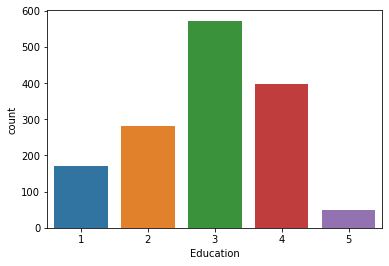

In [10]:
sns.countplot('Education',data=hr_dataset)

<AxesSubplot:xlabel='JobRole', ylabel='count'>

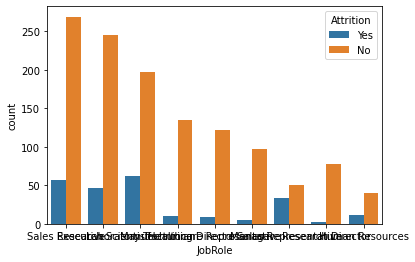

In [11]:
sns.countplot('JobRole',hue='Attrition',data=hr_dataset)

<AxesSubplot:xlabel='EnvironmentSatisfaction', ylabel='count'>

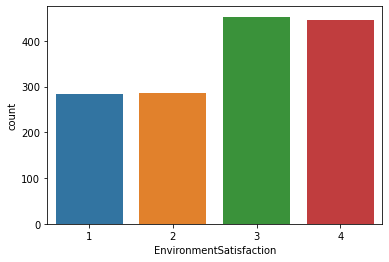

In [12]:
sns.countplot('EnvironmentSatisfaction',data=hr_dataset)

<AxesSubplot:xlabel='EnvironmentSatisfaction', ylabel='count'>

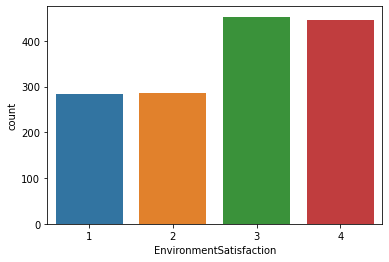

In [13]:
sns.countplot('EnvironmentSatisfaction',data=hr_dataset)

<AxesSubplot:xlabel='PerformanceRating', ylabel='count'>

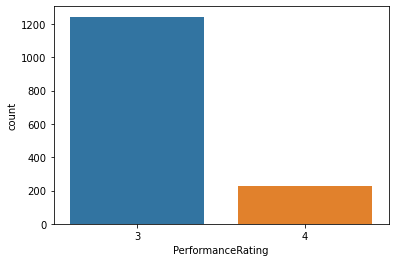

In [14]:
sns.countplot('PerformanceRating',data=hr_dataset)

<AxesSubplot:xlabel='JobLevel', ylabel='count'>

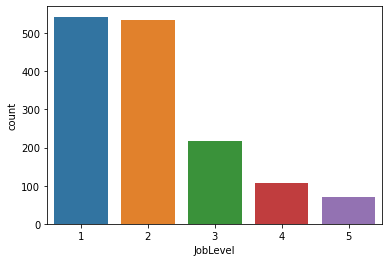

In [15]:
sns.countplot('JobLevel',data=hr_dataset)

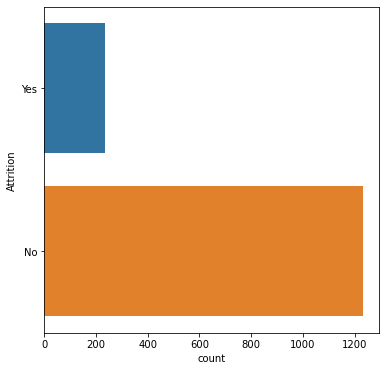

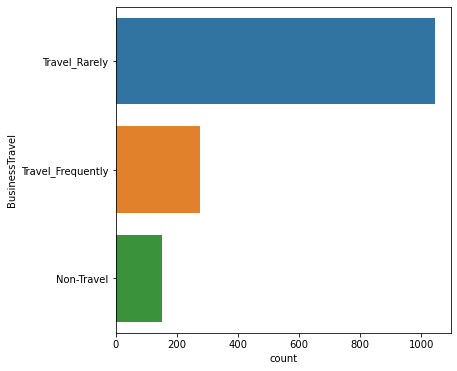

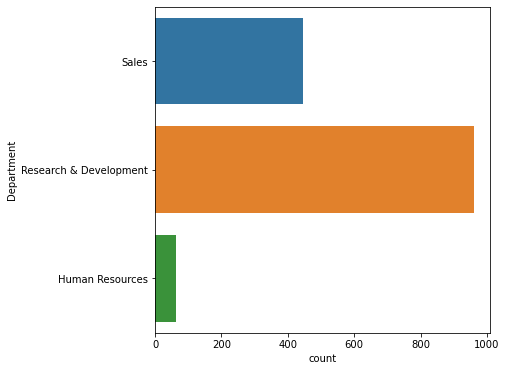

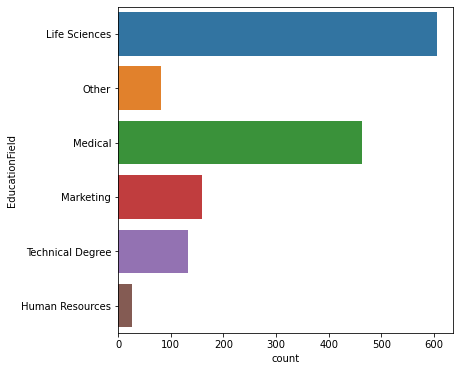

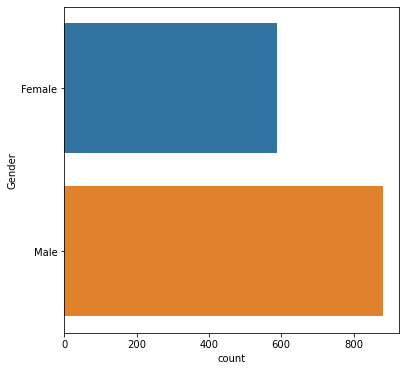

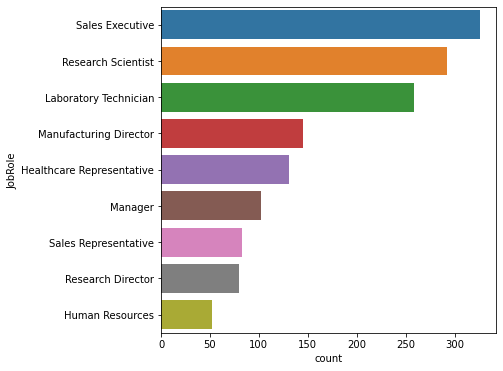

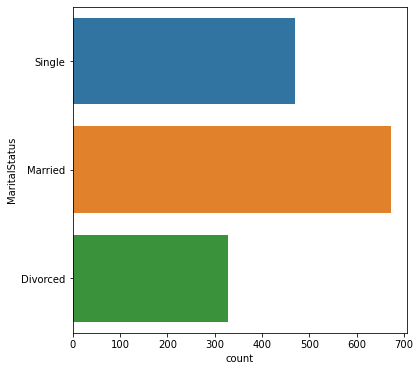

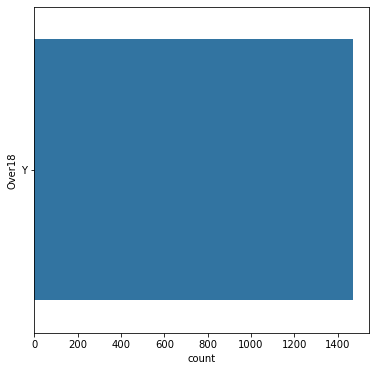

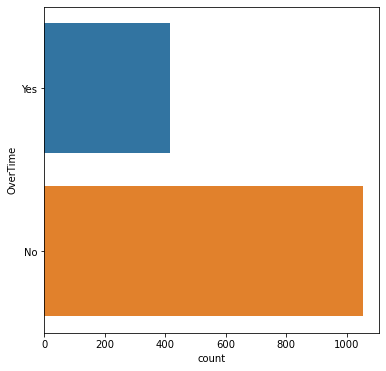

In [16]:
for i in hr_dataset:
    if hr_dataset[i].dtypes=='object':
        plt.figure(figsize=(6,6))
        sns.countplot(y=i,data=hr_dataset)

<AxesSubplot:xlabel='JobSatisfaction', ylabel='count'>

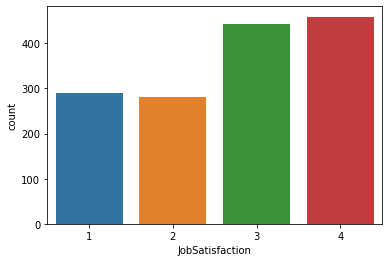

In [17]:
sns.countplot(hr_dataset['JobSatisfaction'],data=hr_dataset)

<AxesSubplot:xlabel='OverTime', ylabel='count'>

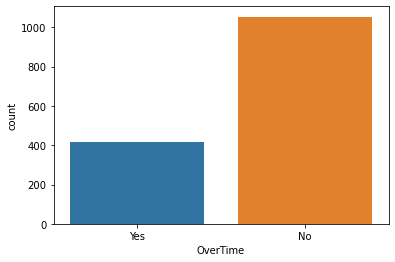

In [18]:
sns.countplot(hr_dataset['OverTime'],data=hr_dataset)

<AxesSubplot:xlabel='RelationshipSatisfaction', ylabel='count'>

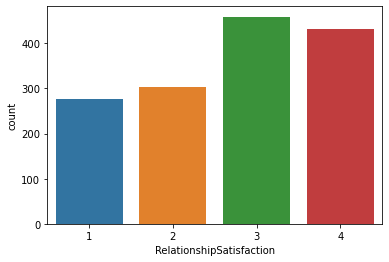

In [19]:
sns.countplot(hr_dataset['RelationshipSatisfaction'],data=hr_dataset)

<AxesSubplot:xlabel='WorkLifeBalance', ylabel='count'>

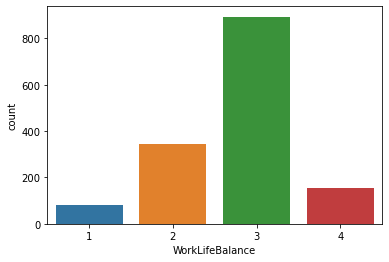

In [20]:
sns.countplot(hr_dataset['WorkLifeBalance'],data=hr_dataset)

<AxesSubplot:xlabel='YearsSinceLastPromotion', ylabel='count'>

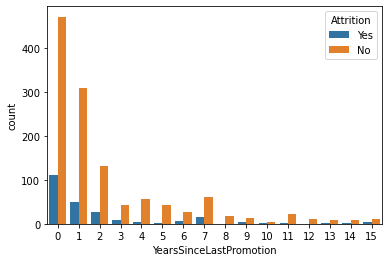

In [21]:
sns.countplot(hr_dataset['YearsSinceLastPromotion'],hue=hr_dataset['Attrition'],data=hr_dataset)

<AxesSubplot:xlabel='YearsWithCurrManager', ylabel='count'>

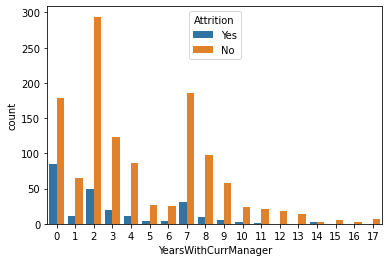

In [22]:
sns.countplot(hr_dataset['YearsWithCurrManager'],hue=hr_dataset['Attrition'],data=hr_dataset)

<AxesSubplot:xlabel='YearsInCurrentRole', ylabel='count'>

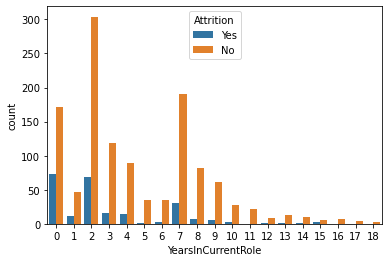

In [23]:
sns.countplot(hr_dataset['YearsInCurrentRole'],hue=hr_dataset['Attrition'],data=hr_dataset)

<AxesSubplot:xlabel='YearsAtCompany', ylabel='count'>

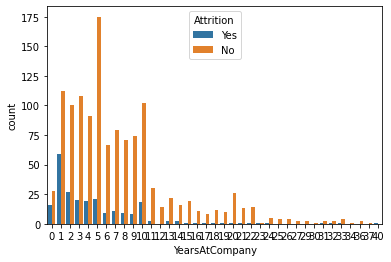

In [24]:
sns.countplot(hr_dataset['YearsAtCompany'],hue=hr_dataset['Attrition'],data=hr_dataset)

<AxesSubplot:xlabel='WorkLifeBalance', ylabel='count'>

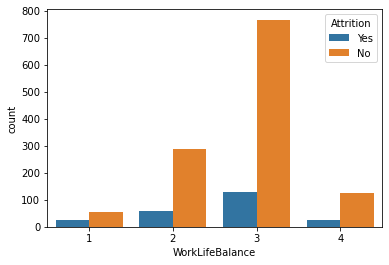

In [25]:
sns.countplot(hr_dataset['WorkLifeBalance'],hue=hr_dataset['Attrition'],data=hr_dataset)

<AxesSubplot:xlabel='OverTime', ylabel='count'>

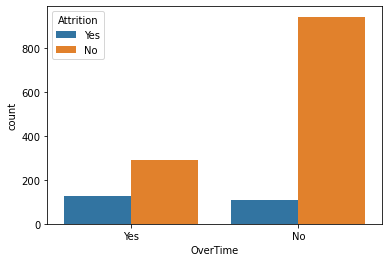

In [26]:
sns.countplot(hr_dataset['OverTime'],hue=hr_dataset['Attrition'],data=hr_dataset)

<AxesSubplot:xlabel='JobSatisfaction', ylabel='count'>

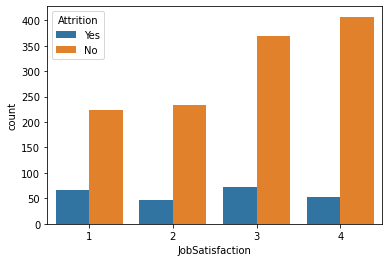

In [27]:
sns.countplot(hr_dataset['JobSatisfaction'],hue=hr_dataset['Attrition'],data=hr_dataset)

<AxesSubplot:xlabel='EnvironmentSatisfaction', ylabel='count'>

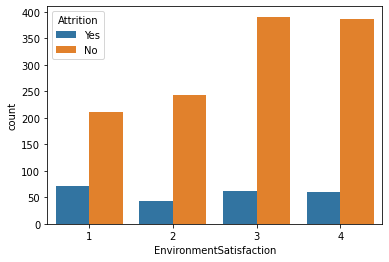

In [28]:
sns.countplot(hr_dataset['EnvironmentSatisfaction'],hue=hr_dataset['Attrition'],data=hr_dataset)

<AxesSubplot:xlabel='BusinessTravel', ylabel='count'>

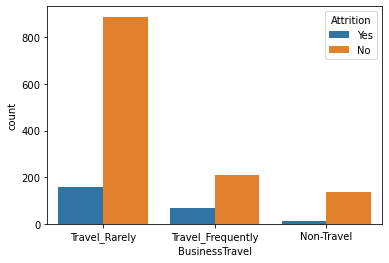

In [29]:
sns.countplot(hr_dataset['BusinessTravel'],hue=hr_dataset['Attrition'],data=hr_dataset)

<AxesSubplot:xlabel='Department', ylabel='count'>

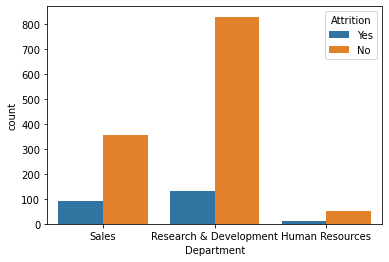

In [30]:
sns.countplot(hr_dataset['Department'],hue=hr_dataset['Attrition'],data=hr_dataset)

<AxesSubplot:xlabel='NumCompaniesWorked', ylabel='count'>

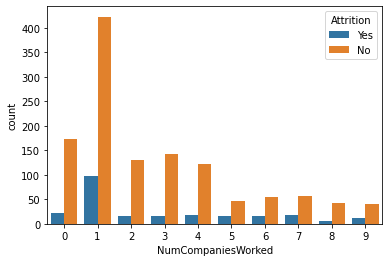

In [31]:
sns.countplot(hr_dataset['NumCompaniesWorked'],hue=hr_dataset['Attrition'],data=hr_dataset)

<AxesSubplot:xlabel='TrainingTimesLastYear', ylabel='count'>

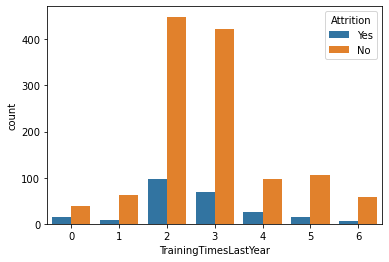

In [32]:
sns.countplot(hr_dataset['TrainingTimesLastYear'],hue=hr_dataset['Attrition'],data=hr_dataset)

<AxesSubplot:xlabel='Education', ylabel='count'>

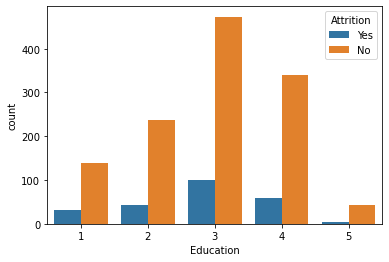

In [33]:
sns.countplot(hr_dataset['Education'],hue=hr_dataset['Attrition'],data=hr_dataset)

<AxesSubplot:xlabel='EducationField', ylabel='count'>

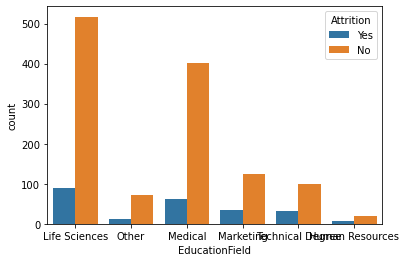

In [34]:
sns.countplot(hr_dataset['EducationField'],hue=hr_dataset['Attrition'],data=hr_dataset)

<AxesSubplot:xlabel='JobInvolvement', ylabel='count'>

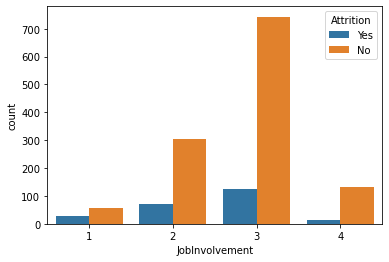

In [35]:
sns.countplot(hr_dataset['JobInvolvement'],hue=hr_dataset['Attrition'],data=hr_dataset)

<AxesSubplot:xlabel='MaritalStatus', ylabel='count'>

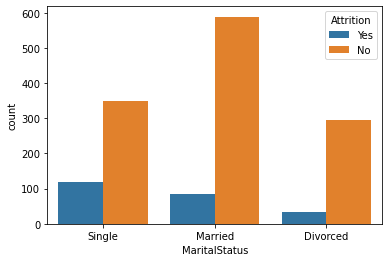

In [36]:
sns.countplot(hr_dataset['MaritalStatus'],hue=hr_dataset['Attrition'],data=hr_dataset)

<AxesSubplot:xlabel='Gender', ylabel='count'>

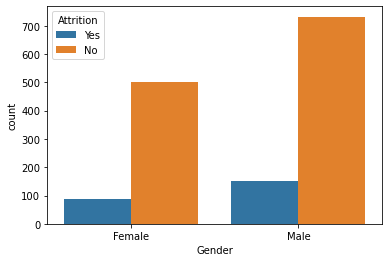

In [37]:
sns.countplot(hr_dataset['Gender'],hue=hr_dataset['Attrition'],data=hr_dataset)

<AxesSubplot:xlabel='count', ylabel='Age'>

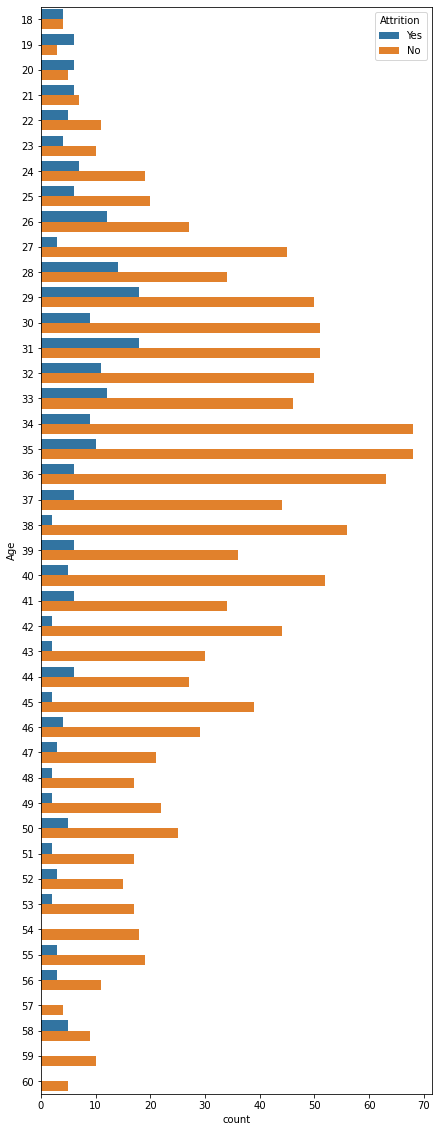

In [38]:
plt.figure(figsize=(7,20))

sns.countplot(y=hr_dataset['Age'],hue=hr_dataset['Attrition'],data=hr_dataset)

<AxesSubplot:xlabel='count', ylabel='TotalWorkingYears'>

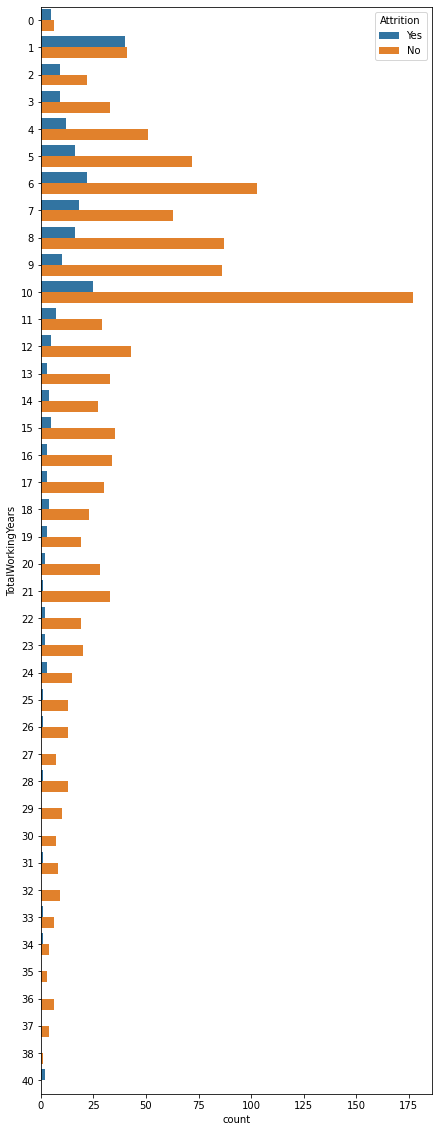

In [39]:
plt.figure(figsize=(7,20))

sns.countplot(y=hr_dataset['TotalWorkingYears'],hue=hr_dataset['Attrition'],data=hr_dataset)

Oberverstion from Data Visualization:
1. Dataset is imbalance as the Attrition highly imbalance.
2. Employee who travel rarely on business purpose have high attrition
3. HR department has the least attrition when compared to other departments.
4. employee with high education level have minimum attrition
5. employee whose relationship status is single have more attrition rate and divorce have minute.
6. Male employee are more likely to have attrition when compared female employees
7. Attrition in Age is normally distributed
8. Employee with less work experience have high attrition.

Converting Categorical data into numerical data:

In [40]:
le= LabelEncoder()
hr_dataset['Attrition']=le.fit_transform(hr_dataset['Attrition'])
hr_dataset['Gender']=le.fit_transform(hr_dataset['Gender'])
hr_dataset['OverTime']=le.fit_transform(hr_dataset['OverTime'])

In [41]:
bt_ordering= sorted(hr_dataset['BusinessTravel'].unique())
dpt_ordering=sorted(hr_dataset['Department'].unique())
ef_ordering= sorted(hr_dataset['EducationField'].unique())
jr_ordering=sorted(hr_dataset['JobRole'].unique())
ms_ordering= sorted(hr_dataset['MaritalStatus'].unique())

In [42]:
def ordinal_en(df, column, ordering):
    df[column]=df[column].apply(lambda x: ordering.index(x))

In [43]:
ordinal_en(hr_dataset, 'BusinessTravel', bt_ordering)
ordinal_en(hr_dataset, 'Department', dpt_ordering)
ordinal_en(hr_dataset, 'EducationField', ef_ordering)
ordinal_en(hr_dataset, 'JobRole', jr_ordering)
ordinal_en(hr_dataset, 'MaritalStatus', ms_ordering)

In [44]:
hr_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   int32 
 2   BusinessTravel            1470 non-null   int64 
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   int64 
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   int64 
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   int32 
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [45]:
hr_dataset.drop(columns=['Over18','EmployeeNumber','EmployeeCount','StandardHours'], inplace=True)

In [46]:
hr_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1470 non-null   int64
 1   Attrition                 1470 non-null   int32
 2   BusinessTravel            1470 non-null   int64
 3   DailyRate                 1470 non-null   int64
 4   Department                1470 non-null   int64
 5   DistanceFromHome          1470 non-null   int64
 6   Education                 1470 non-null   int64
 7   EducationField            1470 non-null   int64
 8   EnvironmentSatisfaction   1470 non-null   int64
 9   Gender                    1470 non-null   int32
 10  HourlyRate                1470 non-null   int64
 11  JobInvolvement            1470 non-null   int64
 12  JobLevel                  1470 non-null   int64
 13  JobRole                   1470 non-null   int64
 14  JobSatisfaction           1470 non-null 

In [47]:
hr_dataset.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBalance                4
YearsAtCompany                37
YearsInCurrentRole            19
YearsSinceLastPromotion       16
YearsWithC

All the data is in numerical form

In [48]:
hr_dataset.describe()

Age    Attrition  BusinessTravel    DailyRate   Department  \
count  1470.000000  1470.000000     1470.000000  1470.000000  1470.000000   
mean     36.923810     0.161224        1.607483   802.485714     1.260544   
std       9.135373     0.367863        0.665455   403.509100     0.527792   
min      18.000000     0.000000        0.000000   102.000000     0.000000   
25%      30.000000     0.000000        1.000000   465.000000     1.000000   
50%      36.000000     0.000000        2.000000   802.000000     1.000000   
75%      43.000000     0.000000        2.000000  1157.000000     2.000000   
max      60.000000     1.000000        2.000000  1499.000000     2.000000   

       DistanceFromHome    Education  EducationField  EnvironmentSatisfaction  \
count       1470.000000  1470.000000     1470.000000              1470.000000   
mean           9.192517     2.912925        2.247619                 2.721769   
std            8.106864     1.024165        1.331369                 1.093082   
min            1.000000     1.000000        0.000000                 1.000000   
25%            2.000000     2.000000        1.000000                 2.000000   
50%            7.000000     3.000000        2.000000                 3.000000   
75%           14.000000     4.000000        3.000000                 4.000000   
max           29.000000     5.000000        5.000000                 4.000000   

            Gender   HourlyRate  JobInvolvement     JobLevel      JobRole  \
count  1470.000000  1470.000000     1470.000000  1470.000000  1470.000000   
mean      0.600000    65.891156        2.729932     2.063946     4.458503   
std       0.490065    20.329428        0.711561     1.106940     2.461821   
min       0.000000    30.000000        1.000000     1.000000     0.000000   
25%       0.000000    48.000000        2.000000     1.000000     2.000000   
50%       1.000000    66.000000        3.000000     2.000000     5.000000   
75%       1.000000    83.750000        3.000000     3.000000     7.000000   
max       1.000000   100.000000        4.000000     5.000000     8.000000   

       JobSatisfaction  MaritalStatus  MonthlyIncome   MonthlyRate  \
count      1470.000000    1470.000000    1470.000000   1470.000000   
mean          2.728571       1.097279    6502.931293  14313.103401   
std           1.102846       0.730121    4707.956783   7117.786044   
min           1.000000       0.000000    1009.000000   2094.000000   
25%           2.000000       1.000000    2911.000000   8047.000000   
50%           3.000000       1.000000    4919.000000  14235.500000   
75%           4.000000       2.000000    8379.000000  20461.500000   
max           4.000000       2.000000   19999.000000  26999.000000   

       NumCompaniesWorked     OverTime  PercentSalaryHike  PerformanceRating  \
count         1470.000000  1470.000000        1470.000000        1470.000000   
mean             2.693197     0.282993          15.209524           3.153741   
std              2.498009     0.450606           3.659938           0.360824   
min              0.000000     0.000000          11.000000           3.000000   
25%              1.000000     0.000000          12.000000           3.000000   
50%              2.000000     0.000000          14.000000           3.000000   
75%              4.000000     1.000000          18.000000           3.000000   
max              9.000000     1.000000          25.000000           4.000000   

       RelationshipSatisfaction  StockOptionLevel  TotalWorkingYears  \
count               1470.000000       1470.000000        1470.000000   
mean                   2.712245          0.793878          11.279592   
std                    1.081209          0.852077           7.780782   
min                    1.000000          0.000000           0.000000   
25%                    2.000000          0.000000           6.000000   
50%                    3.000000          1.000000          10.000000   
75%                    4.000000          

Age


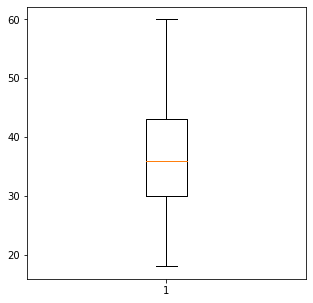

Attrition


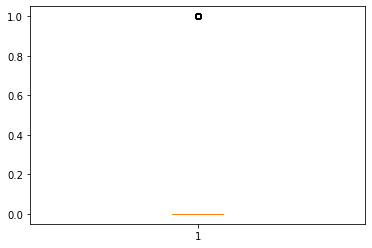

BusinessTravel


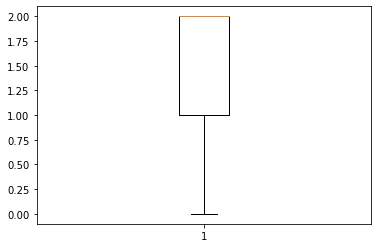

DailyRate


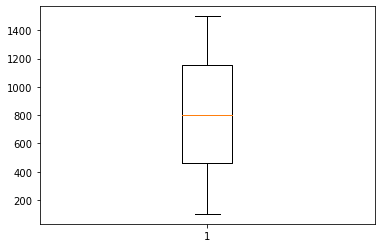

Department


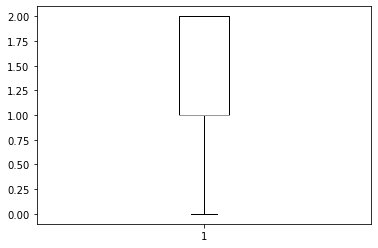

DistanceFromHome


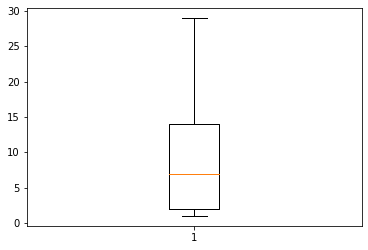

Education


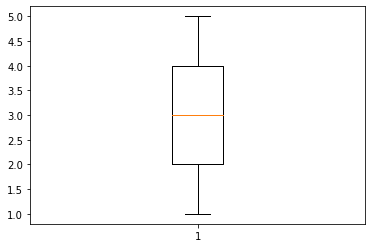

EducationField


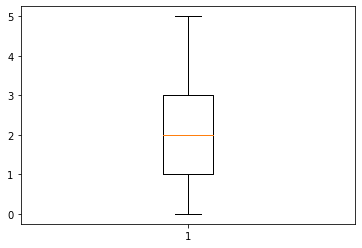

EnvironmentSatisfaction


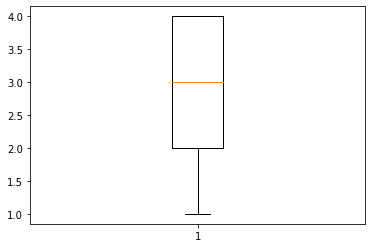

Gender


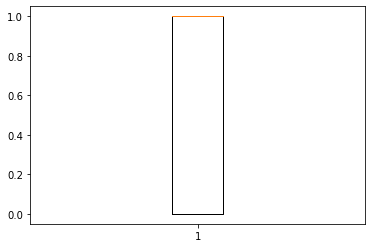

HourlyRate


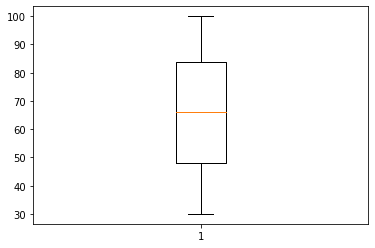

JobInvolvement


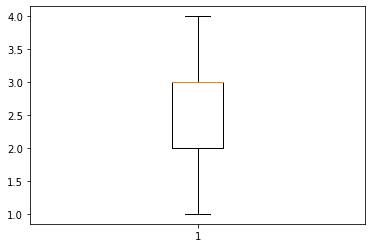

JobLevel


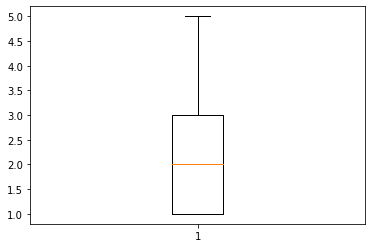

JobRole


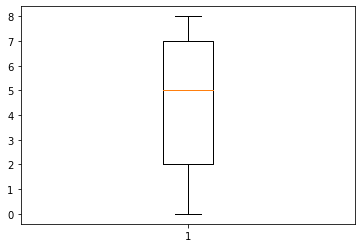

JobSatisfaction


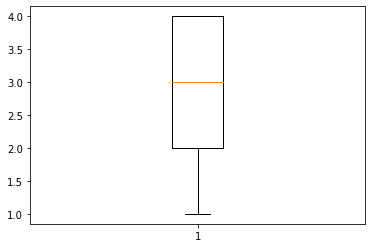

MaritalStatus


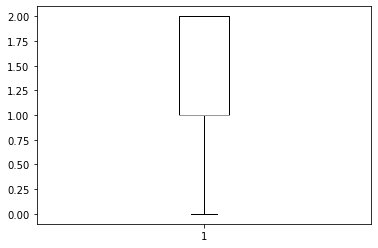

MonthlyIncome


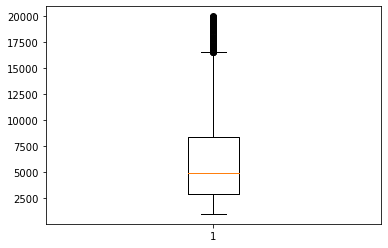

MonthlyRate


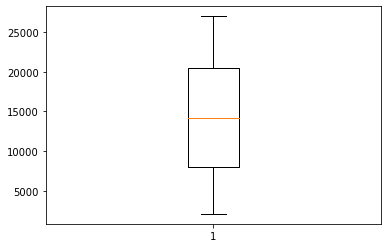

NumCompaniesWorked


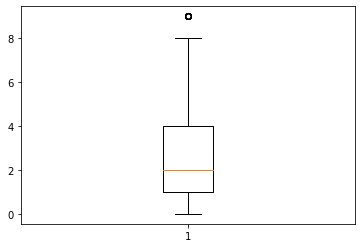

OverTime


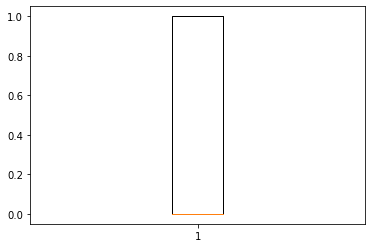

PercentSalaryHike


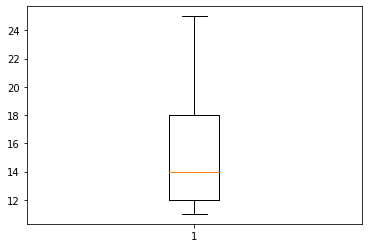

PerformanceRating


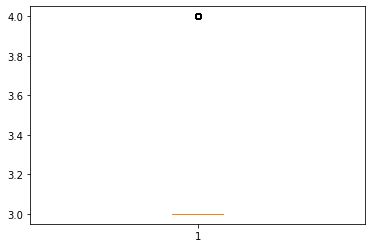

RelationshipSatisfaction


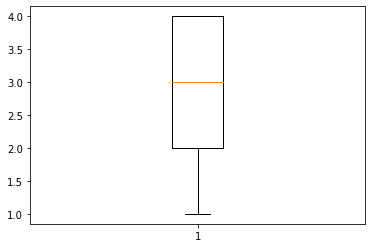

StockOptionLevel


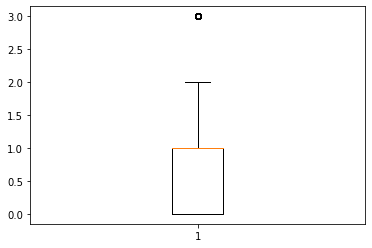

TotalWorkingYears


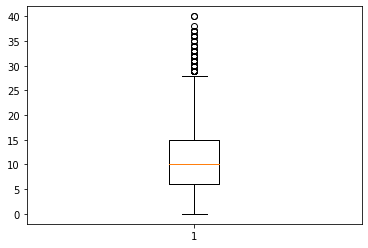

TrainingTimesLastYear


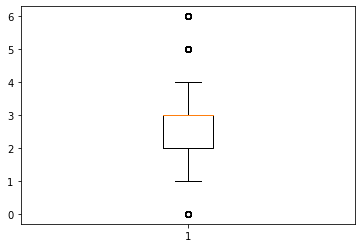

WorkLifeBalance


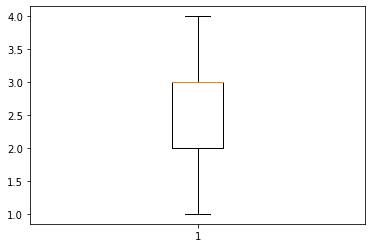

YearsAtCompany


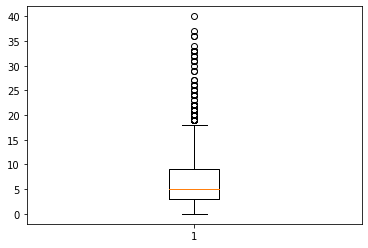

YearsInCurrentRole


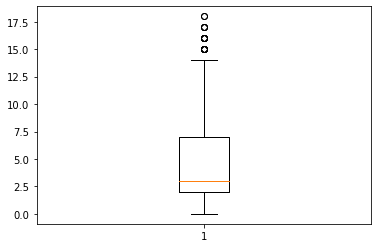

YearsSinceLastPromotion


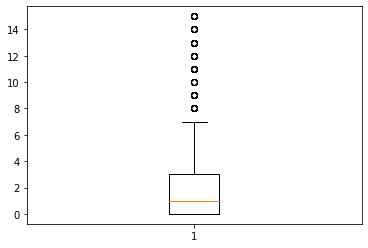

YearsWithCurrManager


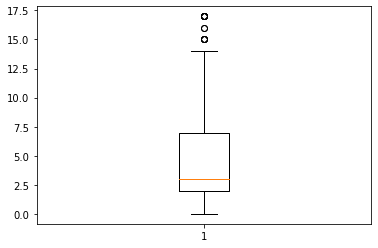

In [49]:
fig = plt.figure(figsize =(5, 5))
for i in hr_dataset: 
    # Creating plot
    print(i)
    plt.boxplot(hr_dataset[i])
    # show plot
    plt.show()

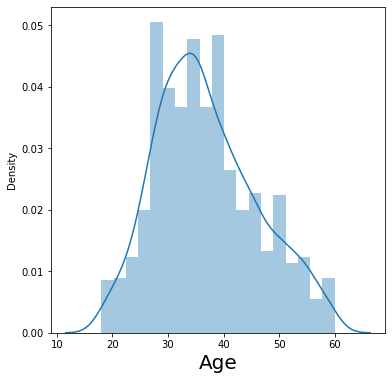

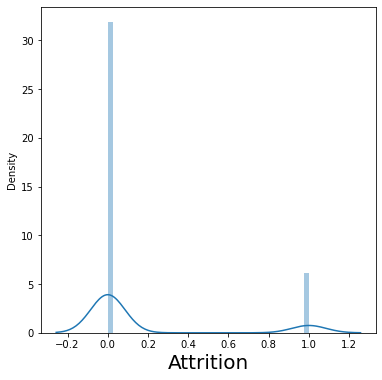

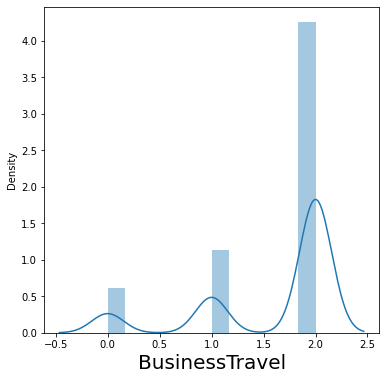

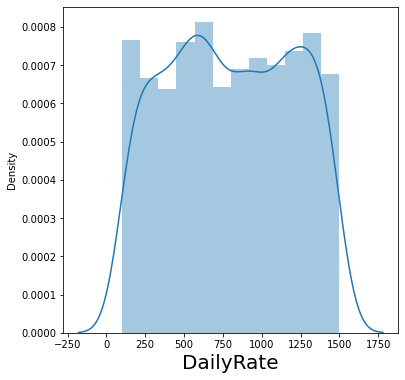

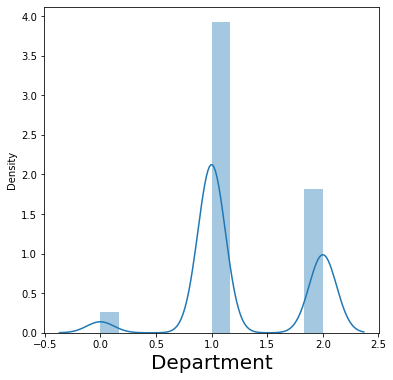

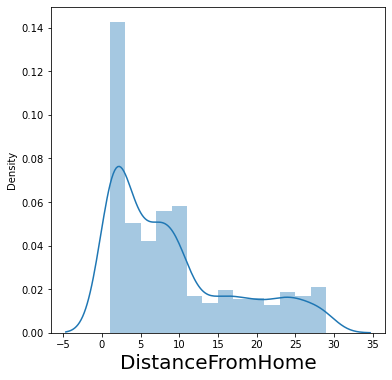

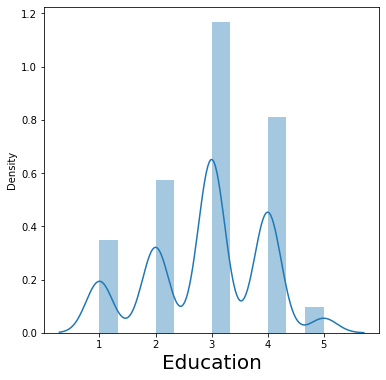

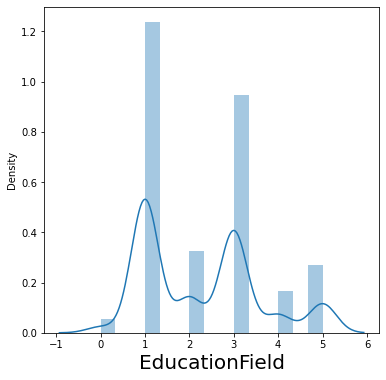

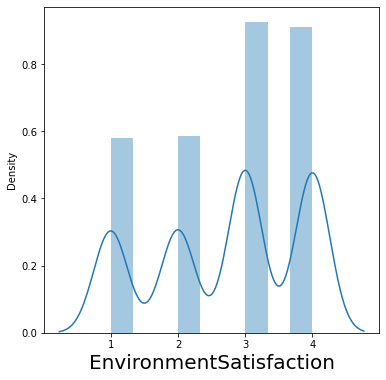

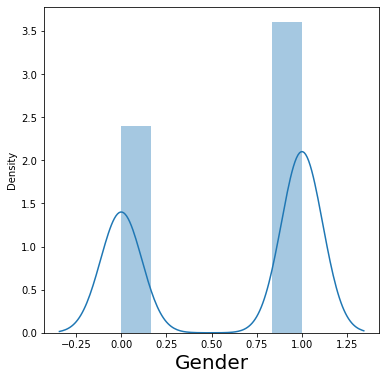

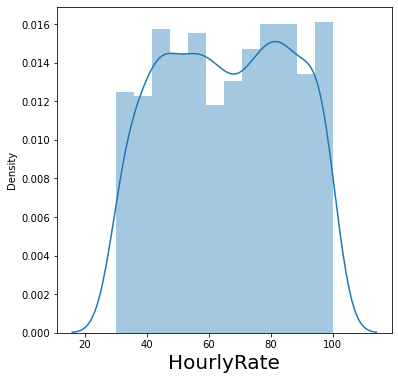

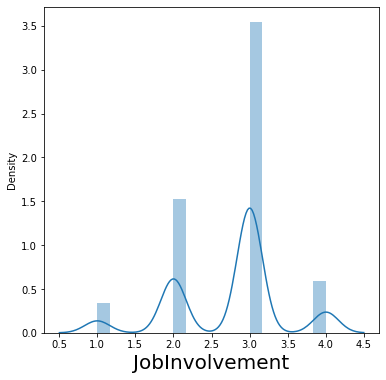

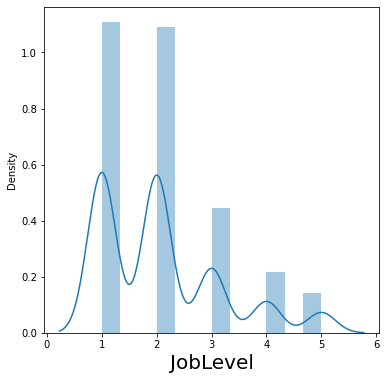

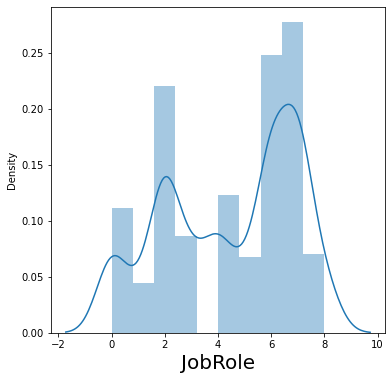

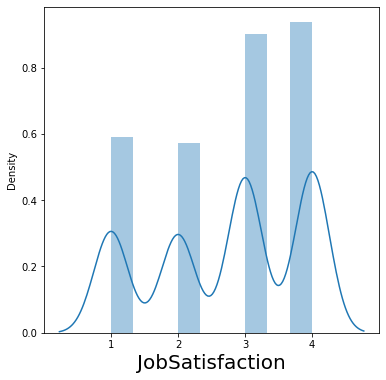

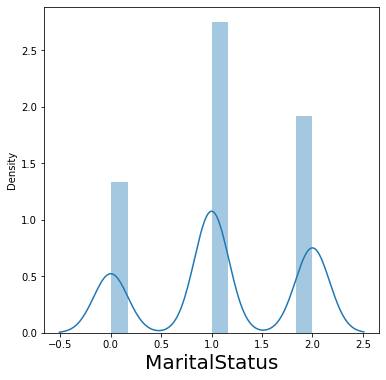

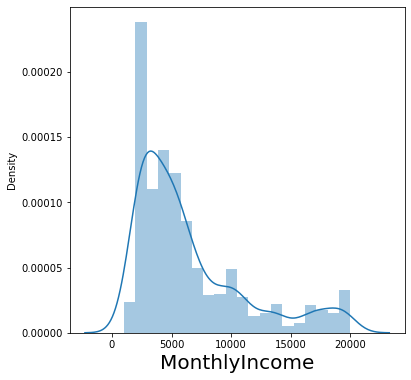

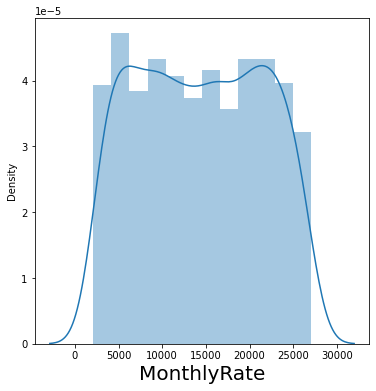

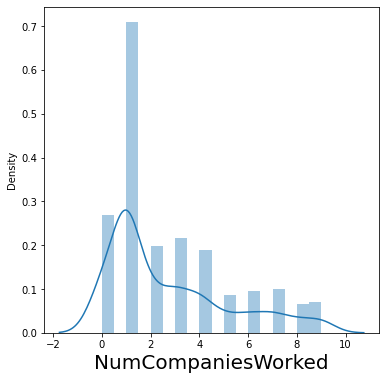

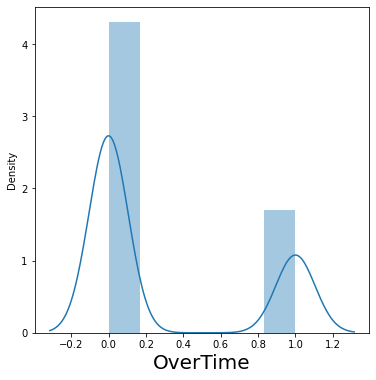

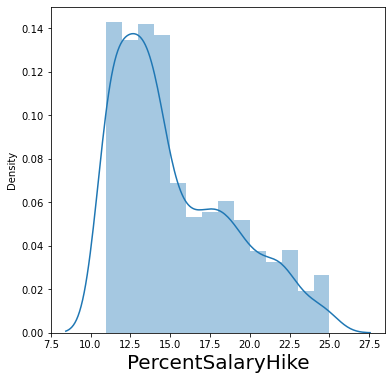

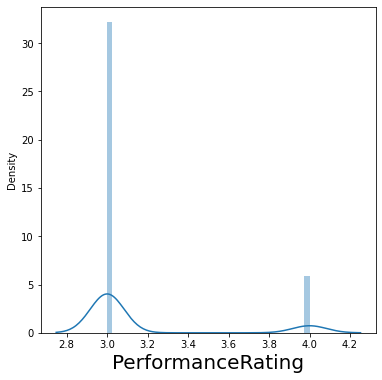

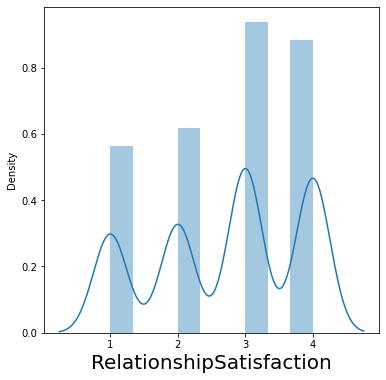

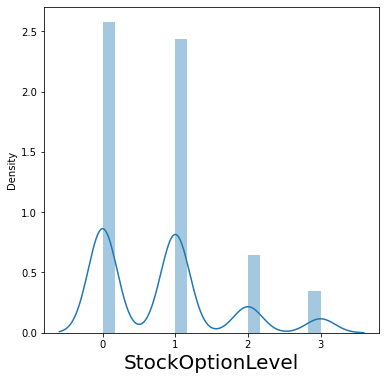

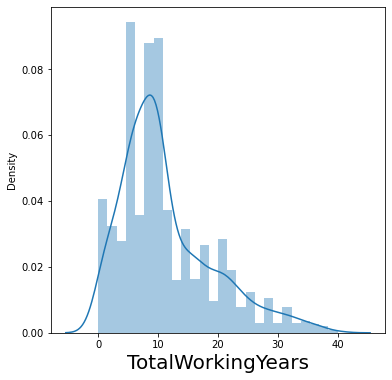

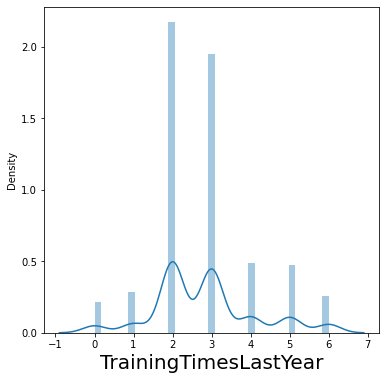

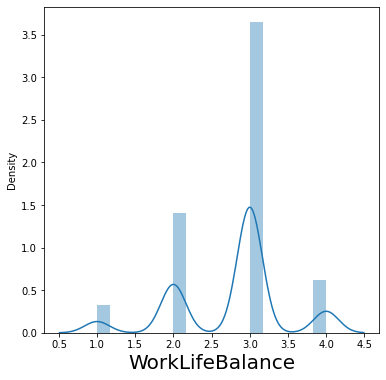

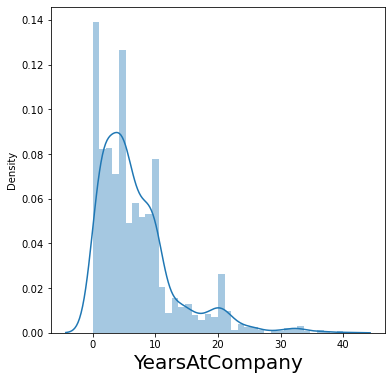

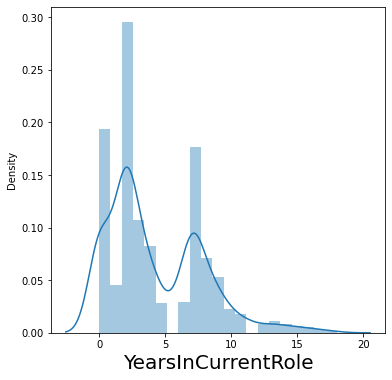

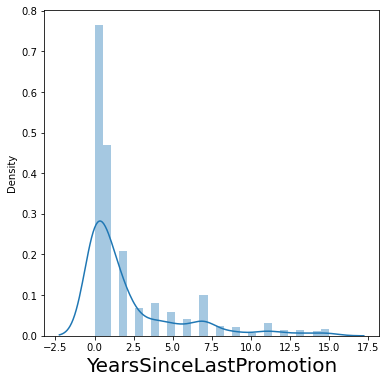

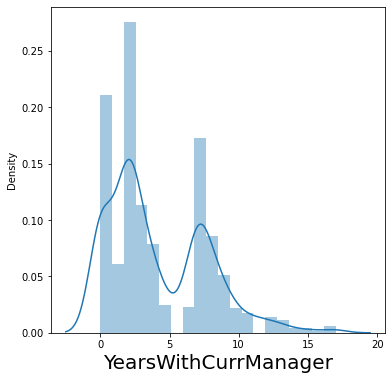

In [50]:
for column in hr_dataset:
    plt.figure(figsize=(6,6))
    sns.distplot(hr_dataset[column])
    plt.xlabel(column,fontsize=20)
    plt.show()

In [51]:
hr_dataset.skew()

Age                         0.413286
Attrition                   1.844366
BusinessTravel             -1.439006
DailyRate                  -0.003519
Department                  0.172231
DistanceFromHome            0.958118
Education                  -0.289681
EducationField              0.550371
EnvironmentSatisfaction    -0.321654
Gender                     -0.408665
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobRole                    -0.357270
JobSatisfaction            -0.329672
MaritalStatus              -0.152175
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
OverTime                    0.964489
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StockOptionLevel            0.968980
TotalWorkingYears           1.117172
TrainingTimesLastYear       0.553124
WorkLifeBalance            -0.552480
Y

In [52]:
def outlier_count(df,column):
    mean = np.mean(df[column])
    std = np.std(df[column])
    threshold = 3
    count=0
    for i in df[column]:
        z = (i-mean)/std
        if z > threshold:
            count+=1
    print(column+' outliers count : ',count)

for i in hr_dataset:
    outlier_count(hr_dataset,i)


Age outliers count :  0
Attrition outliers count :  0
BusinessTravel outliers count :  0
DailyRate outliers count :  0
Department outliers count :  0
DistanceFromHome outliers count :  0
Education outliers count :  0
EducationField outliers count :  0
EnvironmentSatisfaction outliers count :  0
Gender outliers count :  0
HourlyRate outliers count :  0
JobInvolvement outliers count :  0
JobLevel outliers count :  0
JobRole outliers count :  0
JobSatisfaction outliers count :  0
MaritalStatus outliers count :  0
MonthlyIncome outliers count :  0
MonthlyRate outliers count :  0
NumCompaniesWorked outliers count :  0
OverTime outliers count :  0
PercentSalaryHike outliers count :  0
PerformanceRating outliers count :  0
RelationshipSatisfaction outliers count :  0
StockOptionLevel outliers count :  0
TotalWorkingYears outliers count :  16
TrainingTimesLastYear outliers count :  0
WorkLifeBalance outliers count :  0
YearsAtCompany outliers count :  25
YearsInCurrentRole outliers count :  13

Columns which contains outliers:
1. TotalWorkingYears:  16
2. YearsAtCompany:  25
3. YearsInCurrentRole:  13
4. YearsSinceLastPromotion:  42
5. YearsWithCurrManager:  14

In [53]:
#arresting the outliers using IQR method
def arr_out(df,column):
    Q1=df[column].quantile(0.25)
    Q3=df[column].quantile(0.75)
    IQR=Q3-Q1
    whisker_width = 1.5
    news_outliers = df[(df[column] < Q1 - whisker_width*IQR) | (df[column] > Q3 + df*IQR)]
    lower_whisker = Q1 -(whisker_width*IQR)
    upper_whisker = Q3 + (whisker_width*IQR)
    df[column]=np.where(df[column]>upper_whisker,upper_whisker,np.where(df[column]<lower_whisker,lower_whisker,df[column]))


arr_out(hr_dataset,'TotalWorkingYears')
arr_out(hr_dataset,'YearsAtCompany')
arr_out(hr_dataset,'YearsInCurrentRole')
arr_out(hr_dataset,'YearsSinceLastPromotion')
arr_out(hr_dataset,'YearsWithCurrManager')

Age


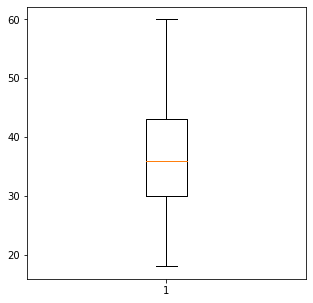

Attrition


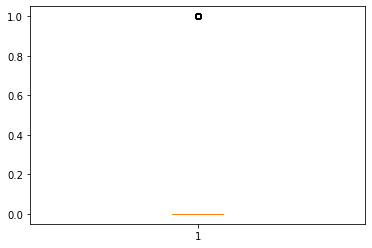

BusinessTravel


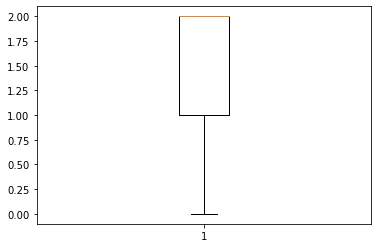

DailyRate


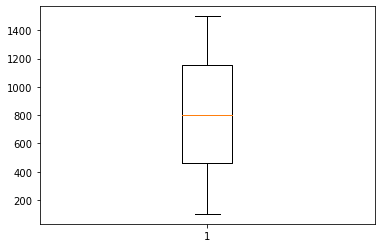

Department


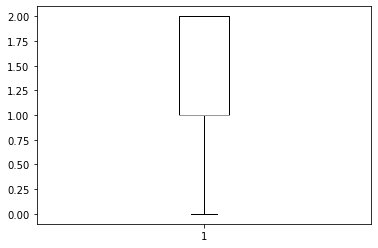

DistanceFromHome


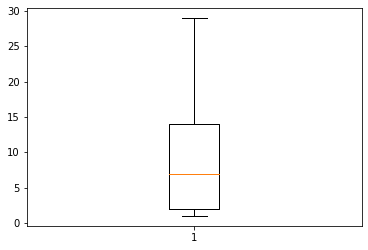

Education


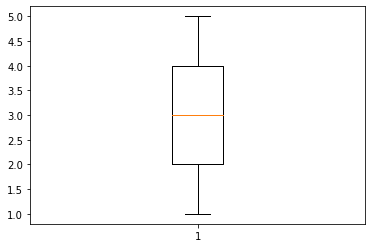

EducationField


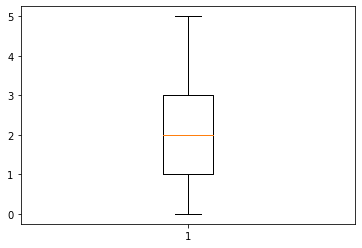

EnvironmentSatisfaction


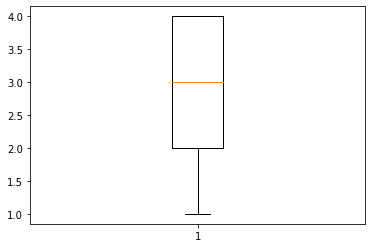

Gender


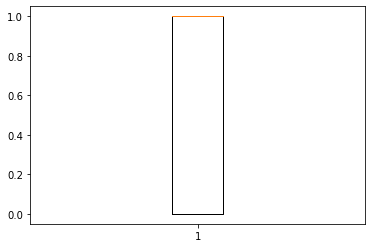

HourlyRate


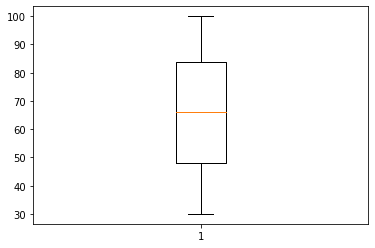

JobInvolvement


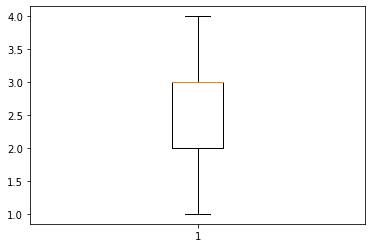

JobLevel


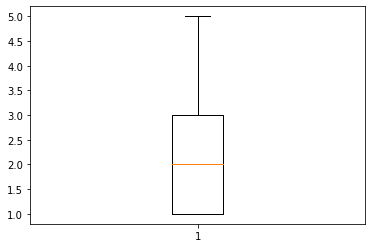

JobRole


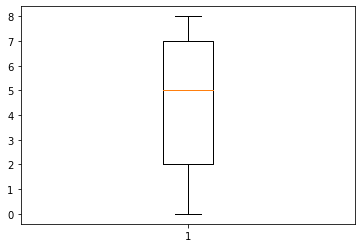

JobSatisfaction


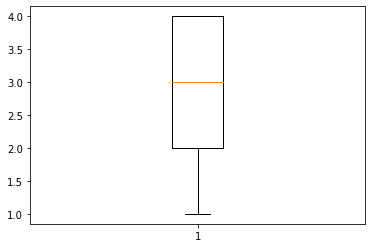

MaritalStatus


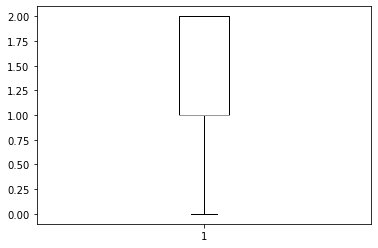

MonthlyIncome


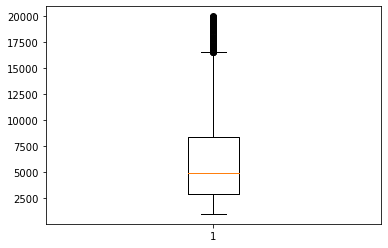

MonthlyRate


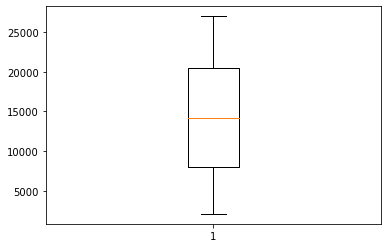

NumCompaniesWorked


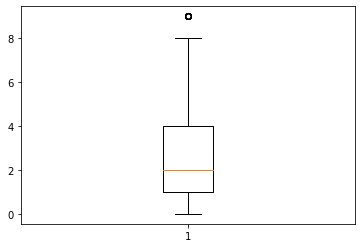

OverTime


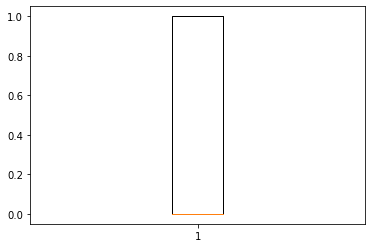

PercentSalaryHike


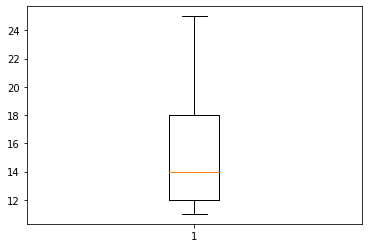

PerformanceRating


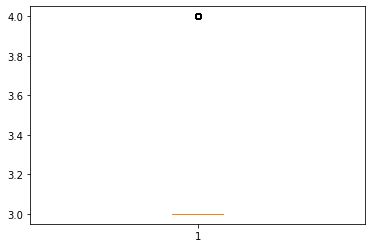

RelationshipSatisfaction


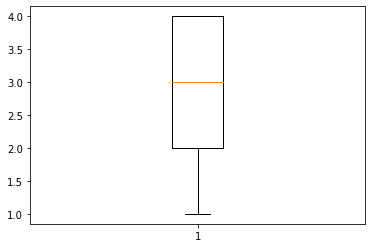

StockOptionLevel


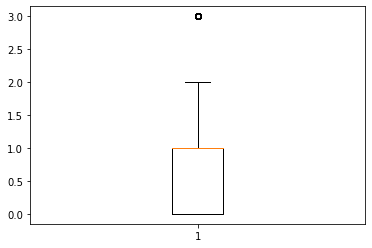

TotalWorkingYears


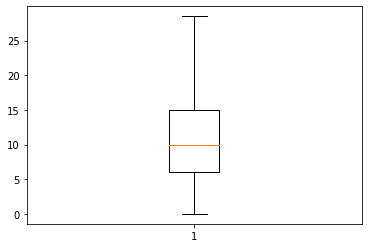

TrainingTimesLastYear


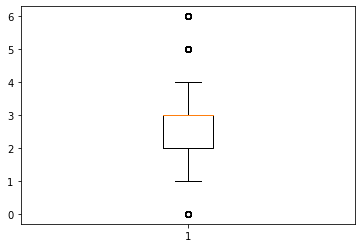

WorkLifeBalance


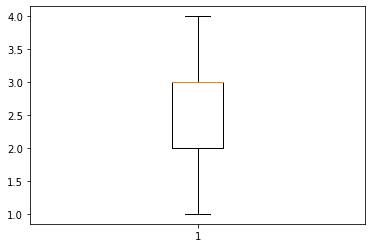

YearsAtCompany


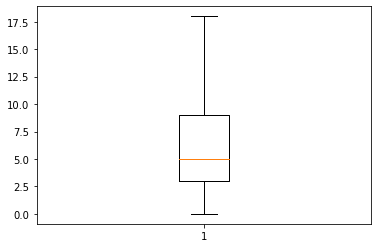

YearsInCurrentRole


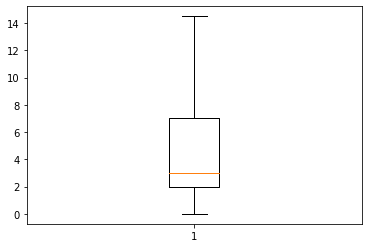

YearsSinceLastPromotion


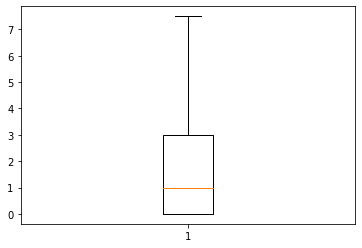

YearsWithCurrManager


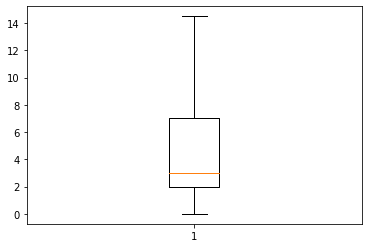

In [54]:
fig = plt.figure(figsize =(5, 5))
for i in hr_dataset: 
    # Creating plot
    print(i)
    plt.boxplot(hr_dataset[i])
    # show plot
    plt.show()

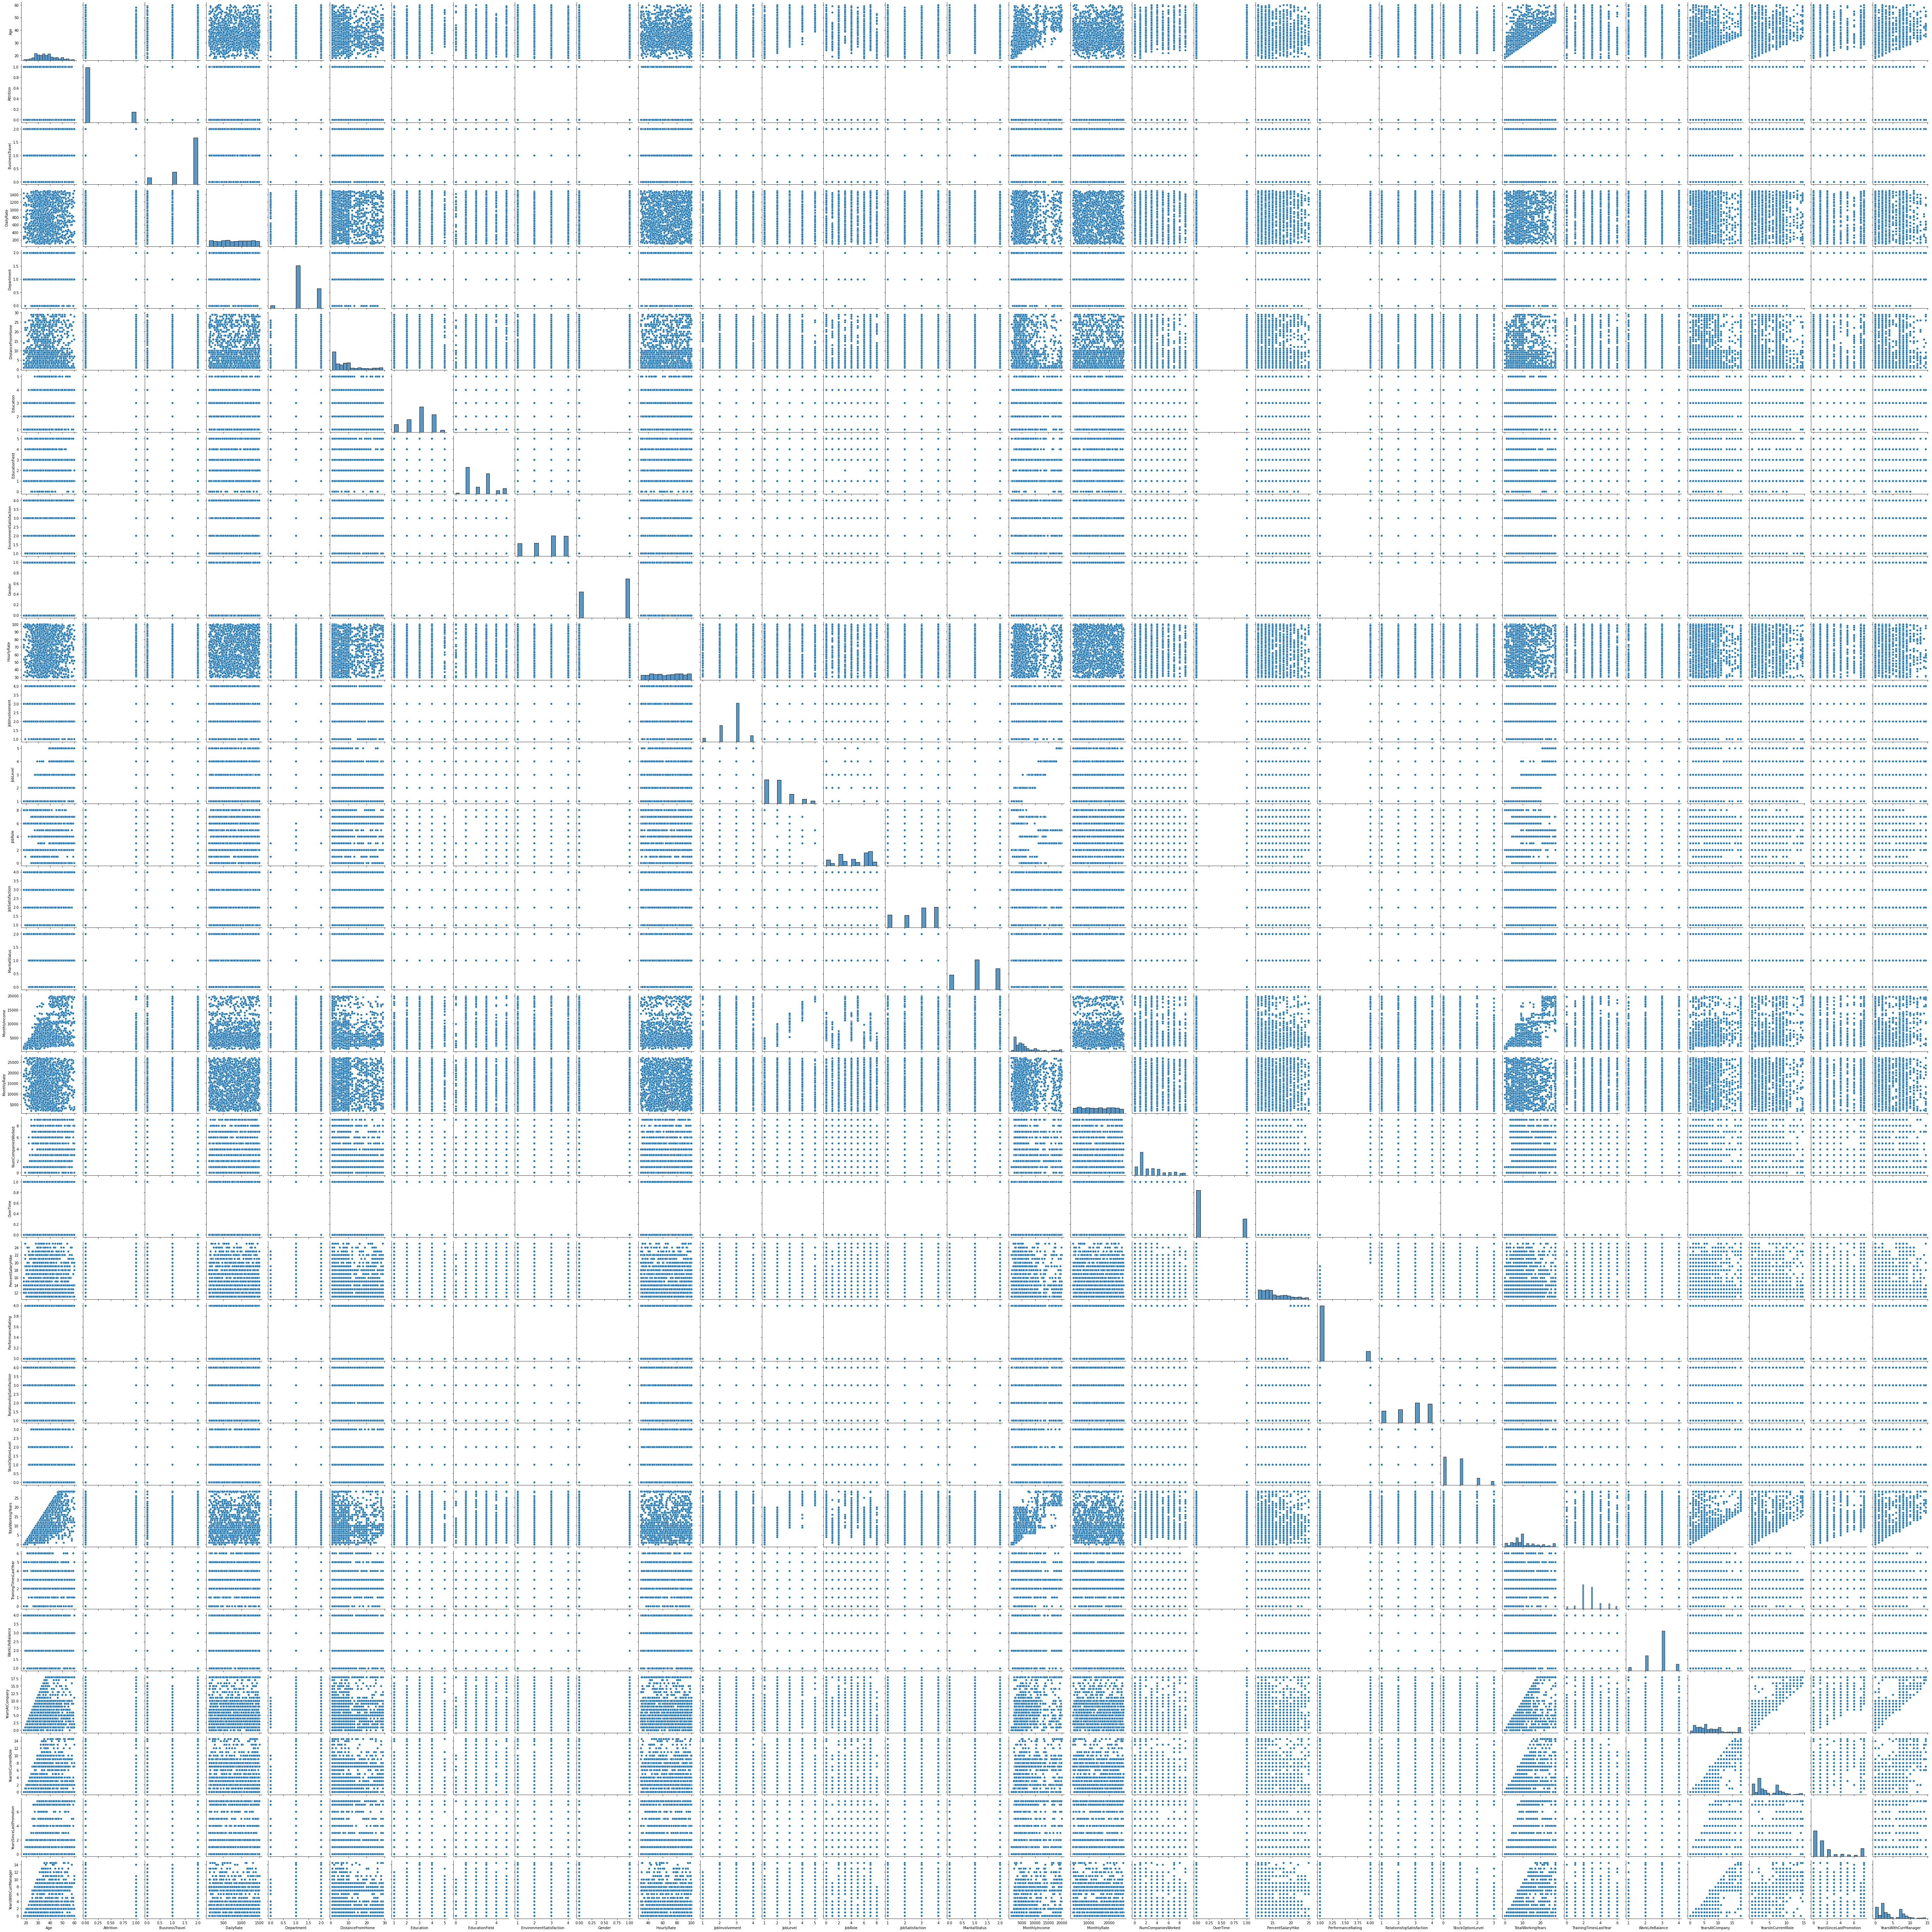

In [55]:
sns.pairplot(hr_dataset)

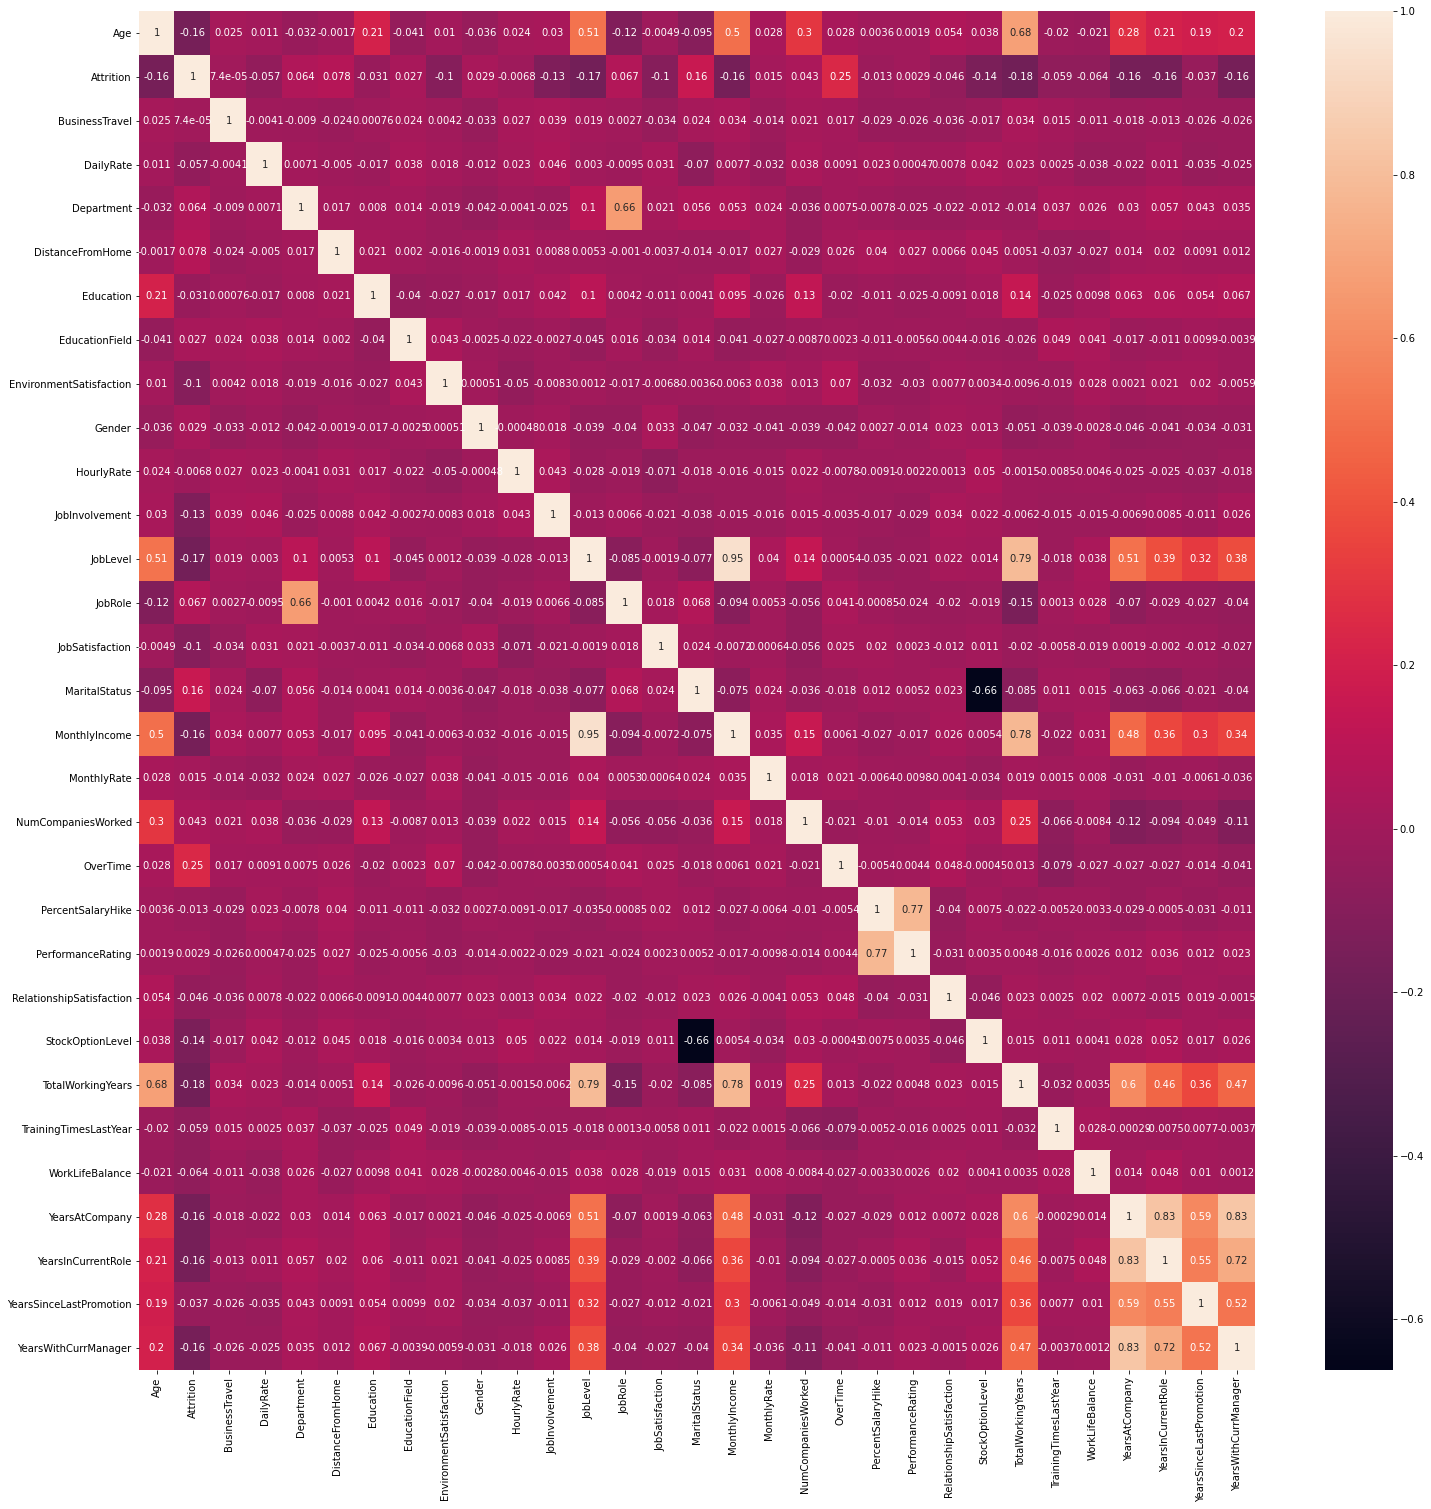

In [56]:
plt.figure(figsize=(25,25))
sns.heatmap(hr_dataset.corr(), annot=True)
plt.show()

In [93]:
hr_dataset.head()

Age  Attrition  BusinessTravel  DailyRate  Department  DistanceFromHome  \
0   41          1               2       1102           2                 1   
1   49          0               1        279           1                 8   
2   37          1               2       1373           1                 2   
3   33          0               1       1392           1                 3   
4   27          0               2        591           1                 2   

   Education  EducationField  EnvironmentSatisfaction  Gender  HourlyRate  \
0          2               1                        2       0          94   
1          1               1                        3       1          61   
2          2               4                        4       1          92   
3          4               1                        4       0          56   
4          1               3                        1       1          40   

   JobInvolvement  JobLevel  JobRole  JobSatisfaction  MaritalStatus  \
0               3         2        7                4              2   
1               2         2        6                2              1   
2               2         1        2                3              2   
3               3         1        6                3              1   
4               3         1        2                2              1   

   MonthlyIncome  MonthlyRate  NumCompaniesWorked  OverTime  \
0           5993        19479                   8         1   
1           5130        24907                   1         0   
2           2090         2396                   6         1   
3           2909        23159                   1         1   
4           3468        16632                   9         0   

   PercentSalaryHike  PerformanceRating  RelationshipSatisfaction  \
0                 11                  3                         1   
1                 23                  4                         4   
2                 15                  3                         2   
3                 11                  3                         3   
4                 12                  3                         4   

   StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                 0                8.0                      0   
1                 1               10.0                      3   
2                 0                7.0                      3   
3                 0                8.0                      3   
4                 1                6.0                      3   

   WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                1             6.0                 4.0   
1                3            10.0                 7.0   
2                3             0.0                 0.0   
3                3             8.0                 7.0   
4                3             2.0                 2.0   

   YearsSinceLastPromotion  YearsWithCurrManager  
0                      0.0                   5.0  
1                      1.0                   7.0  
2                      0.0                   0.0  
3                      3.0                   0.0  
4                      2.0                   2.0

In [57]:
#separating features and prediction:
X=hr_dataset.drop(columns=['Attrition'])
Y=hr_dataset['Attrition']

In [58]:
scalar= StandardScaler()
X_scaled= scalar.fit_transform(X)

In [59]:
#checking VIF value 
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

vif_data["VIF"] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]
  
vif_data

feature        VIF
0                        Age   2.049875
1             BusinessTravel   1.015997
2                  DailyRate   1.024178
3                 Department   1.941321
4           DistanceFromHome   1.017184
5                  Education   1.063827
6             EducationField   1.016832
7    EnvironmentSatisfaction   1.018941
8                     Gender   1.020383
9                 HourlyRate   1.021583
10            JobInvolvement   1.019313
11                  JobLevel  11.904438
12                   JobRole   1.893400
13           JobSatisfaction   1.021565
14             MaritalStatus   1.841813
15             MonthlyIncome  11.014916
16               MonthlyRate   1.016376
17        NumCompaniesWorked   1.257759
18                  OverTime   1.028411
19         PercentSalaryHike   2.523743
20         PerformanceRating   2.518896
21  RelationshipSatisfaction   1.019383
22          StockOptionLevel   1.819719
23         TotalWorkingYears   4.848123
24     TrainingTimesLastYear   1.023239
25           WorkLifeBalance   1.018564
26            YearsAtCompany   6.606343
27        YearsInCurrentRole   3.392407
28   YearsSinceLastPromotion   1.582748
29      YearsWithCurrManager   3.403899

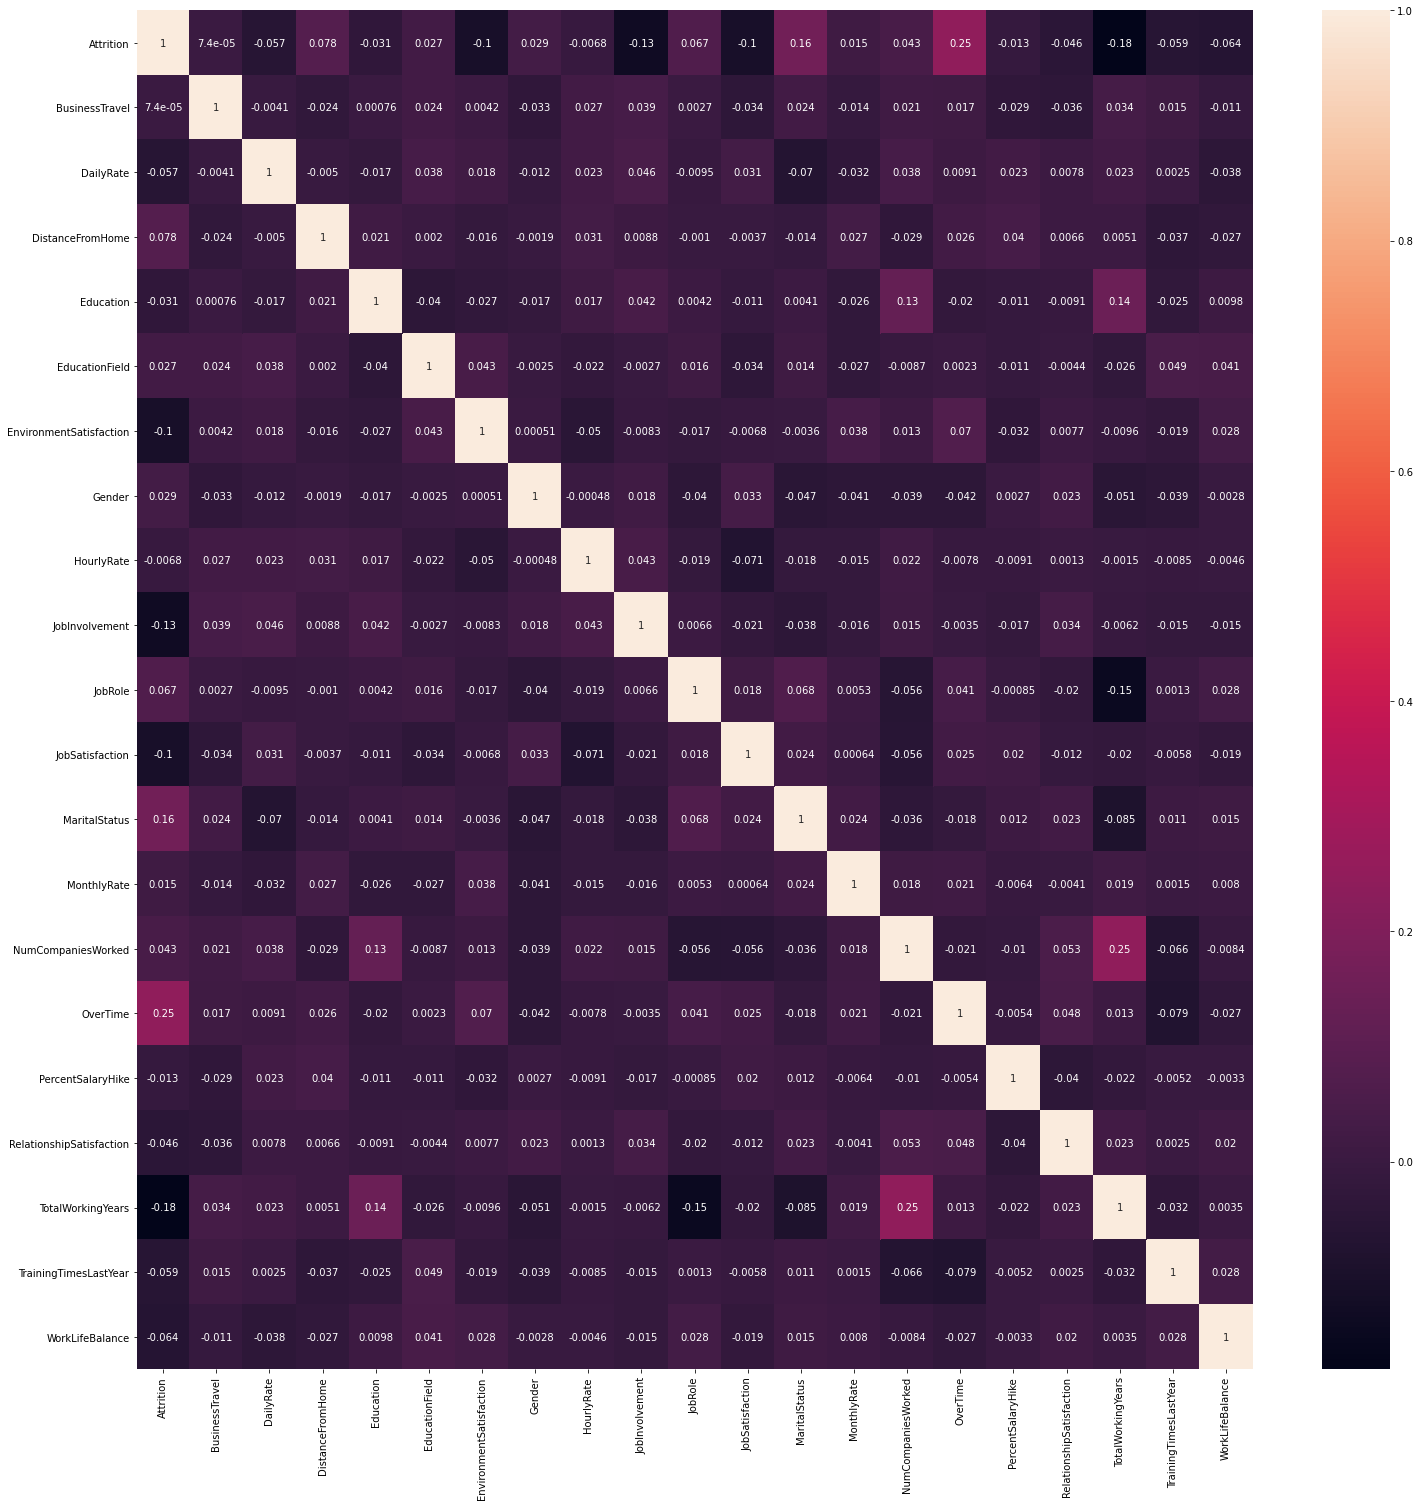

In [60]:
New_set=hr_dataset.drop(columns=['Age','Department','JobLevel','MonthlyIncome','PerformanceRating','StockOptionLevel','YearsAtCompany','YearsSinceLastPromotion','YearsInCurrentRole','YearsWithCurrManager'])
plt.figure(figsize=(25,25))
sns.heatmap(New_set.corr(), annot=True)
plt.show()

In [89]:
X_hr=New_set.drop(columns=['Attrition'])
Y_hr=New_set['Attrition']
X_scaled_hr= scalar.fit_transform(X_hr)

In [90]:
#VIF for Region prediction
#checking VIF value 
vif_data1 = pd.DataFrame()
vif_data1["feature"] = X_hr.columns

vif_data1["VIF"] = [variance_inflation_factor(X_scaled_hr, i) for i in range(X_scaled_hr.shape[1])]
  
vif_data1

feature       VIF
0             BusinessTravel  1.010810
1                  DailyRate  1.015944
2           DistanceFromHome  1.008995
3                  Education  1.039065
4             EducationField  1.012961
5    EnvironmentSatisfaction  1.014959
6                     Gender  1.016795
7                 HourlyRate  1.013436
8             JobInvolvement  1.011804
9                    JobRole  1.033267
10           JobSatisfaction  1.015341
11             MaritalStatus  1.023722
12               MonthlyRate  1.008961
13        NumCompaniesWorked  1.090022
14                  OverTime  1.022442
15         PercentSalaryHike  1.007335
16  RelationshipSatisfaction  1.013013
17         TotalWorkingYears  1.113932
18     TrainingTimesLastYear  1.018874
19           WorkLifeBalance  1.008434

In [91]:
hr_dataset['Attrition'].sum()/1470

0.16122448979591836

the dataset is high imbalance in nature. i.e. accuracy of the model must greater than 83% 

# Upsampling the data

In [99]:
Xnew=pd.DataFrame(X_scaled_hr)
Xnew.columns=X_hr.columns

In [100]:
X_train, X_test, y_train, y_test = train_test_split(Xnew, Y_hr, train_size=0.7)

In [101]:
X=pd.concat([X_train,y_train],axis=1)

In [102]:
no_att=X[X.Attrition==0]
yes_att=X[X.Attrition==1]

In [103]:
att_upsampled=resample(yes_att,replace=True,n_samples=len(no_att),random_state=20)

In [104]:
upsampled=pd.concat([no_att,att_upsampled])

In [105]:
upsampled.Attrition.value_counts()

0    863
1    863
Name: Attrition, dtype: int64

In [106]:
upsampled

BusinessTravel  DailyRate  DistanceFromHome  Education  EducationField  \
516         0.590048   0.204561         -0.640727   0.085049        0.565311   
23          0.590048  -1.020115          0.716610  -0.891688       -0.937414   
240         0.590048   1.558151         -1.010909   1.061787        0.565311   
1017        0.590048   1.424280          0.223033  -1.868426       -0.937414   
787        -0.913194   0.715256         -0.887515  -1.868426       -0.937414   
...              ...        ...               ...        ...             ...   
51          0.590048   1.565588         -0.517332   1.061787        2.068035   
1297        0.590048   0.291330          1.333581  -0.891688        0.565311   
1153       -0.913194  -0.640813         -0.764121  -0.891688        0.565311   
842         0.590048   1.692023          0.346427  -1.868426       -0.937414   
752         0.590048   0.204561          0.840004   1.061787       -0.937414   

      EnvironmentSatisfaction    Gender  HourlyRate  JobInvolvement   JobRole  \
516                 -1.575686  0.816497   -0.388296        1.785511  0.626374   
23                   0.254625  0.816497    1.481551        0.379672  0.626374   
240                  0.254625 -1.224745    1.481551        0.379672 -0.998992   
1017                -0.660531  0.816497    1.235519        0.379672 -0.998992   
787                  1.169781  0.816497   -0.043851        0.379672 -0.186309   
...                       ...       ...         ...             ...       ...   
51                   0.254625  0.816497   -0.781948        0.379672 -0.998992   
1297                 1.169781 -1.224745    0.152975        0.379672 -1.405334   
1153                -0.660531 -1.224745    0.202182        0.379672  1.439057   
842                  0.254625 -1.224745    0.645041        0.379672 -0.998992   
752                  0.254625 -1.224745   -1.126394        1.785511 -0.998992   

      JobSatisfaction  MaritalStatus  MonthlyRate  NumCompaniesWorked  \
516         -1.567907      -0.133282    -0.810795           -0.277594   
23           1.153254       1.236820     0.698193           -0.678049   
240          0.246200      -1.503385     0.155143            1.724681   
1017        -1.567907      -0.133282    -0.932363           -1.078504   
787         -0.660853      -0.133282     0.210797            0.122861   
...               ...            ...          ...                 ...   
51           0.246200       1.236820    -0.440470           -0.678049   
1297        -0.660853      -0.133282    -1.043390           -1.078504   
1153         1.153254       1.236820     0.577187           -0.678049   
842          1.153254      -0.133282     1.214540           -0.678049   
752         -1.567907       1.236820    -0.849444           -0.678049   

      OverTime  PercentSalaryHike  RelationshipSatisfaction  \
516  -0.628241           0.216054                 -1.584178   
23   -0.628241          -0.330589                  1.191438   
240  -0.628241          -0.330589                  0.266233   
1017 -0.628241          -0.330589                 -0.658973   
787  -0.628241           0.762698                 -0.658973   
...        ...                ...                       ...   
51    1.591746          -0.603911                  0.266233   
1297  1.591746          -1.150554                  0.266233   
1153  1.591746          -0.877232                  0.266233   
842   1.591746          -1.150554                  1.191438   
752  -0.628241           0.216054                  0.266233   

      TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  Attrition  
516           -0.835882               0.155707         1.754054          0  
23            -1.520687               2.483396         0.338096          0  
240           -0.561960              -1.396086         0.338096          0  
1017          -0.698921               0.155707         1.754054          0  
787            1.629418               0.931603       

In [107]:
X_new_value=upsampled.drop(columns=['Attrition'])
Y_new_value=upsampled['Attrition']

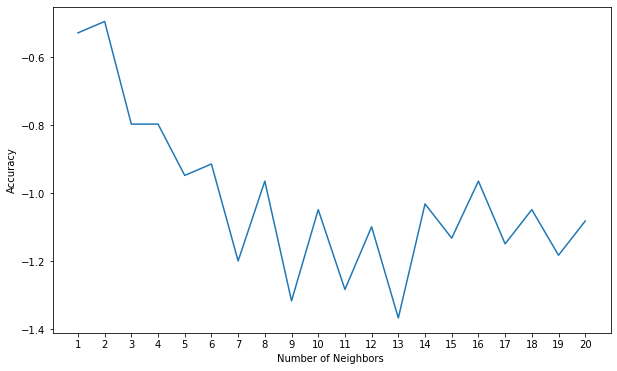

In [108]:
knc = KNeighborsClassifier()
mean_acc = np.zeros(20)
for i in range(1,21):
    #Train Model and Predict  
    knc = KNeighborsClassifier(n_neighbors = i).fit(X_new_value,Y_new_value)
    yhat2= knc.predict(X_test)
    mean_acc[i-1] = metrics.r2_score(y_test, yhat2)

loc = np.arange(1,21,step=1.0)
plt.figure(figsize = (10, 6))
plt.plot(range(1,21), mean_acc)
plt.xticks(loc)
plt.xlabel('Number of Neighbors ')
plt.ylabel('Accuracy')
plt.show()

In [109]:
knn_region_model=KNeighborsClassifier()
para={
        'n_neighbors':[1,2],
        'weights':['uniform', 'distance'],
        'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute','auto'],
        'leaf_size':[30,40,50],
        'p':[2],
        'metric':['minkowski']
    
}
knnR_gs= gs(estimator =knn_region_model, param_grid=para,cv=20, n_jobs=5)
knnR_gs.fit(X_new_value,Y_new_value)

GridSearchCV(cv=20, estimator=KNeighborsClassifier(), n_jobs=5,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute',
                                       'auto'],
                         'leaf_size': [30, 40, 50], 'metric': ['minkowski'],
                         'n_neighbors': [1, 2], 'p': [2],
                         'weights': ['uniform', 'distance']})

In [110]:
knnR_gs.best_estimator_

KNeighborsClassifier(n_neighbors=1)

In [115]:
model1=KNeighborsClassifier(n_neighbors=1)
model1.fit(X_new_value,Y_new_value)
X_test_predict= model1.predict(X_test)
test_data_accu= accuracy_score(X_test_predict, y_test)

print(classification_report(y_test,X_test_predict))


print(confusion_matrix(y_test,X_test_predict))
print('Accuracy of the KNN Model  :', test_data_accu)

              precision    recall  f1-score   support

           0       0.86      0.89      0.88       370
           1       0.33      0.27      0.29        71

    accuracy                           0.79       441
   macro avg       0.60      0.58      0.59       441
weighted avg       0.78      0.79      0.79       441

[[331  39]
 [ 52  19]]
Accuracy of the RF Model  : 0.7936507936507936


In [117]:
rfc_region_model=RandomForestClassifier()
paras={
      'max_depth':[1,2,3,4,5],
    'min_samples_split':[1,2,3,4],
    'max_leaf_nodes':[10,20,30,40,50],
    'min_samples_leaf':[100,200,300,400],
    'n_estimators':[100,200,300,400],
    'max_samples': [0.1,0.2,0.3,0.4],
    'max_features':[1,2,3,4]
}
rfcR_gs= rs(estimator =rfc_region_model, param_distributions=paras,cv=20, n_jobs=10)
rfcR_gs.fit(X_new_value,Y_new_value)

RandomizedSearchCV(cv=20, estimator=RandomForestClassifier(), n_jobs=10,
                   param_distributions={'max_depth': [1, 2, 3, 4, 5],
                                        'max_features': [1, 2, 3, 4],
                                        'max_leaf_nodes': [10, 20, 30, 40, 50],
                                        'max_samples': [0.1, 0.2, 0.3, 0.4],
                                        'min_samples_leaf': [100, 200, 300,
                                                             400],
                                        'min_samples_split': [1, 2, 3, 4],
                                        'n_estimators': [100, 200, 300, 400]})

In [119]:
rfcR_gs.best_estimator_

RandomForestClassifier(max_depth=5, max_features=2, max_leaf_nodes=20,
                       max_samples=0.3, min_samples_leaf=100, n_estimators=300)

In [120]:
model2=RandomForestClassifier(max_depth=5, max_features=2, max_leaf_nodes=20,
                       max_samples=0.3, min_samples_leaf=100, n_estimators=300)
model2.fit(X_new_value,Y_new_value)

RandomForestClassifier(max_depth=5, max_features=2, max_leaf_nodes=20,
                       max_samples=0.3, min_samples_leaf=100, n_estimators=300)

In [122]:
X_test_predict1= model2.predict(X_test)
test_data_accu1= accuracy_score(X_test_predict1, y_test)

print(classification_report(y_test,X_test_predict1))


print(confusion_matrix(y_test,X_test_predict1))
print('Accuracy of the Random Forest Model  :', test_data_accu1)

              precision    recall  f1-score   support

           0       0.93      0.71      0.81       370
           1       0.33      0.73      0.45        71

    accuracy                           0.72       441
   macro avg       0.63      0.72      0.63       441
weighted avg       0.84      0.72      0.75       441

[[264 106]
 [ 19  52]]
Accuracy of the Random Forest Model  : 0.7165532879818595


In [123]:
model3 = LogisticRegression()

In [125]:
model3.fit(X_new_value,Y_new_value)

LogisticRegression()

In [126]:
X_test_predict2= model3.predict(X_test)
test_data_accu2= accuracy_score(X_test_predict2, y_test)

print(classification_report(y_test,X_test_predict2))


print(confusion_matrix(y_test,X_test_predict2))
print('Accuracy of the Logistics Regression Model  :', test_data_accu2)

              precision    recall  f1-score   support

           0       0.94      0.74      0.83       370
           1       0.36      0.75      0.48        71

    accuracy                           0.74       441
   macro avg       0.65      0.74      0.66       441
weighted avg       0.85      0.74      0.77       441

[[275  95]
 [ 18  53]]
Accuracy of the Logistics Regression Model  : 0.7437641723356009


In [130]:
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, X_test_predict)
false_positive_rate2, true_positive_rate2, threshold3 = roc_curve(y_test, X_test_predict1)
false_positive_rate3, true_positive_rate3, threshold3 = roc_curve(y_test, X_test_predict2)
print('roc_auc_score for KNeighborsClassifier Model: ', roc_auc_score(y_test, X_test_predict))
print('roc_auc_score for Random Forest Model: ', roc_auc_score(y_test, X_test_predict1))
print('roc_auc_score for Logistics Regression Model: ', roc_auc_score(y_test, X_test_predict2))

roc_auc_score for KNeighborsClassifier Model:  0.7229539398553483
roc_auc_score for Random Forest Model:  0.7229539398553483
roc_auc_score for Logistics Regression Model:  0.7448610582413399


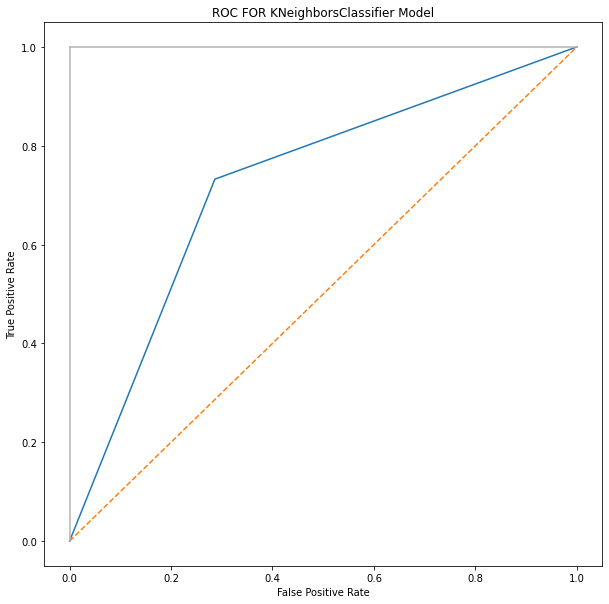

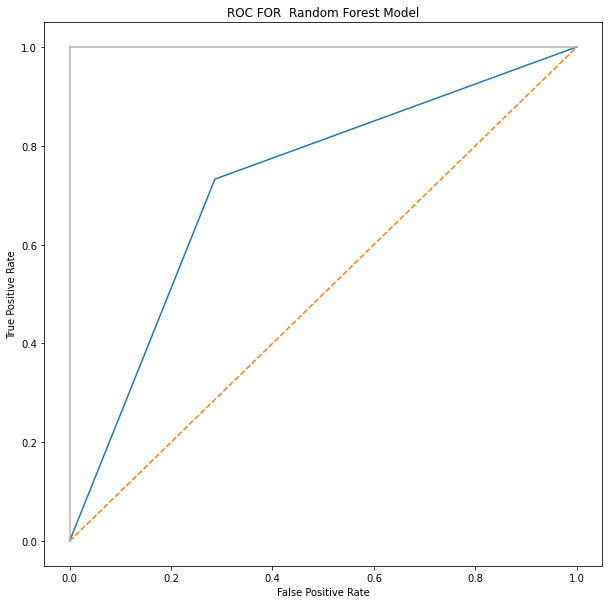

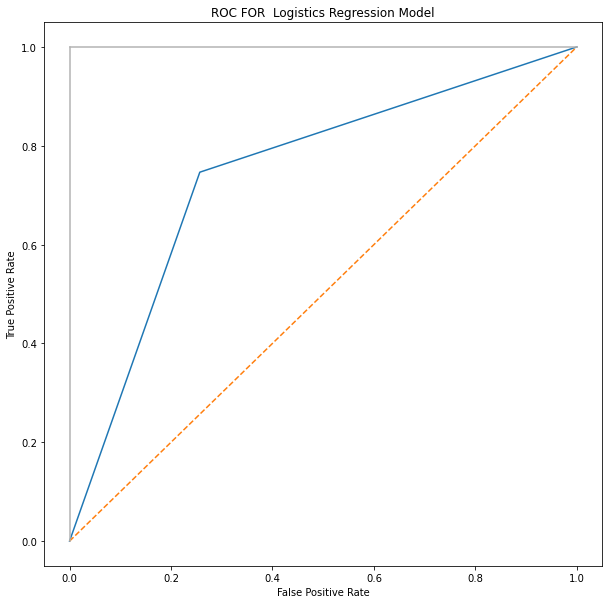

In [131]:
plt.subplots(1, figsize=(10,10))
plt.title('ROC FOR KNeighborsClassifier Model')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

plt.subplots(1, figsize=(10,10))
plt.title('ROC FOR  Random Forest Model')
plt.plot(false_positive_rate2, true_positive_rate2)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

plt.subplots(1, figsize=(10,10))
plt.title('ROC FOR  Logistics Regression Model')
plt.plot(false_positive_rate3, true_positive_rate3)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Logistic Regression has better f1 score, recall and precision of no attrition and yes attrition compared to random forest and KNC

In [ ]:
#saving the model
Log_Reg_Model_for_HR_attrition= pickle.dumps(model3)